In [3489]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [3490]:
house_data = pd.read_csv("train.csv")

In [3491]:
house_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3492]:
house_data.shape

(1460, 81)

In [3493]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3494]:
house_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [3495]:
data_null = round(house_data.isnull().sum()/len(house_data)*100,2)

In [3496]:
pd.set_option('display.max_rows', None)
data_null

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [3497]:
data_null = data_null[data_null>0]
data_null.sort_values(ascending = False)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

#### All above columns contains significant number of NULL values. But we cannot remove these columns as presence or absence of these facilities will be having an impact on the price.

#### So Null values will be imputed as "Not Available" for the time being and we will take a call upon further analysis

In [3498]:
null_fields = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_fields:
    house_data[i].fillna("Not Available", inplace=True)

####  Take the % of remaining null values

In [3499]:
data_null = round(house_data.isnull().sum()/len(house_data)*100,2)
data_null.sort_values(ascending = False)[data_null > 0]

LotFrontage    17.74
GarageYrBlt     5.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64

In [3500]:
house_data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [3501]:
house_data['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [3502]:
house_data['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

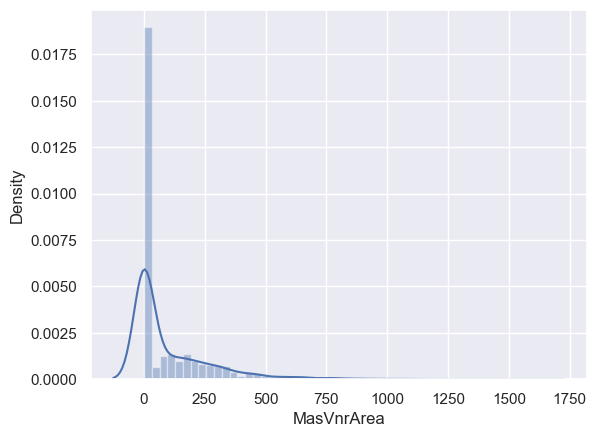

In [3503]:
sns.distplot(house_data['MasVnrArea'])

In [3504]:
house_data['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

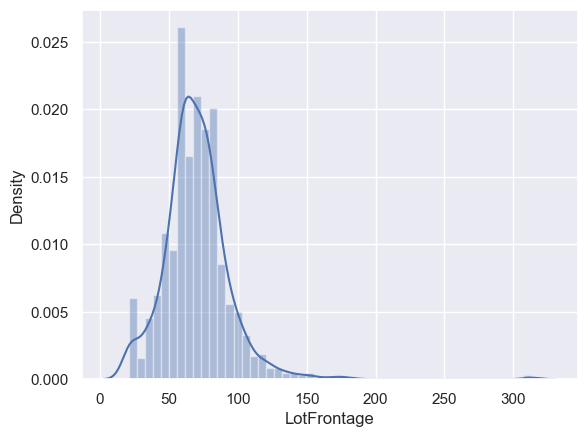

In [3505]:
sns.distplot(house_data['LotFrontage'])

#### Numerical values are imputed by Median after analysing their data distribution. NA value from Electrical column is dropped

In [3506]:
house_data['LotFrontage'] = house_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
house_data["GarageYrBlt"].fillna(house_data["GarageYrBlt"].median(), inplace=True)
house_data["MasVnrArea"].fillna(house_data["MasVnrArea"].median(), inplace=True)
house_data["Electrical"].dropna(inplace=True)

In [3507]:
# Check the no. of rows retained
len(house_data)
len(house_data)/1460

1.0

###  EDA

####  Removing ID column as it will not be having any impact on house price

In [3508]:
house_data = house_data.drop(["Id"],axis=1)

In [3509]:
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street          Alley LotShape  \
0          60       RL         65.0     8450   Pave  Not Available      Reg   
1          20       RL         80.0     9600   Pave  Not Available      Reg   
2          60       RL         68.0    11250   Pave  Not Available      IR1   
3          70       RL         60.0     9550   Pave  Not Available      IR1   
4          60       RL         84.0    14260   Pave  Not Available      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
0             1          Gd             8        Typ           0   
1             1          TA             6        Typ           1   
2             1          Gd             6        Typ           1   
3             1          Gd             7        Typ     

In [3510]:
# Select all numeric variables
house_data_numeric = house_data.select_dtypes(include=['float64', 'int64'])
house_data_numeric.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

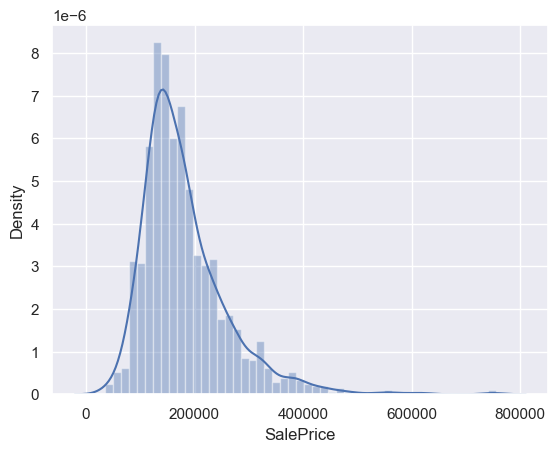

In [3511]:
sns.distplot(house_data_numeric['SalePrice'])

#### As we can see above response variable Sale Price is distributed normally though it is right skewed. Right skewness is clearly visible in below box plot

<AxesSubplot:xlabel='SalePrice'>

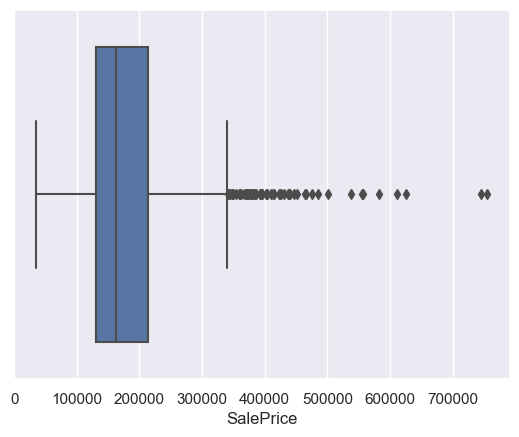

In [3512]:
sns.boxplot(house_data_numeric['SalePrice'])

In [3513]:
house_data_numeric['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### Applying log due to right skewness in data

In [3514]:
house_data['log_SalePrice'] = np.log1p(house_data['SalePrice'])

<AxesSubplot:xlabel='log_SalePrice', ylabel='Density'>

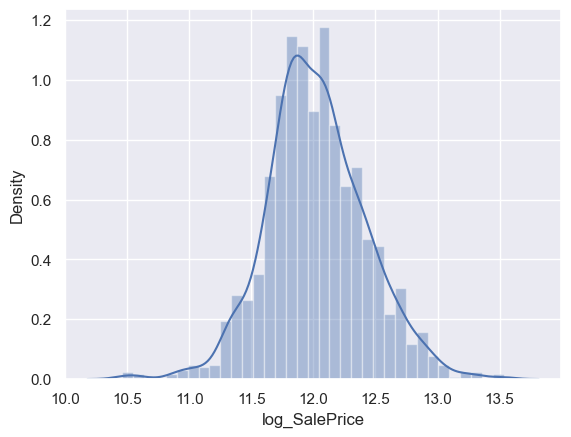

In [3515]:
sns.distplot(house_data['log_SalePrice'])

### Explore relationship between Response variable and some of the explanatory variables

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

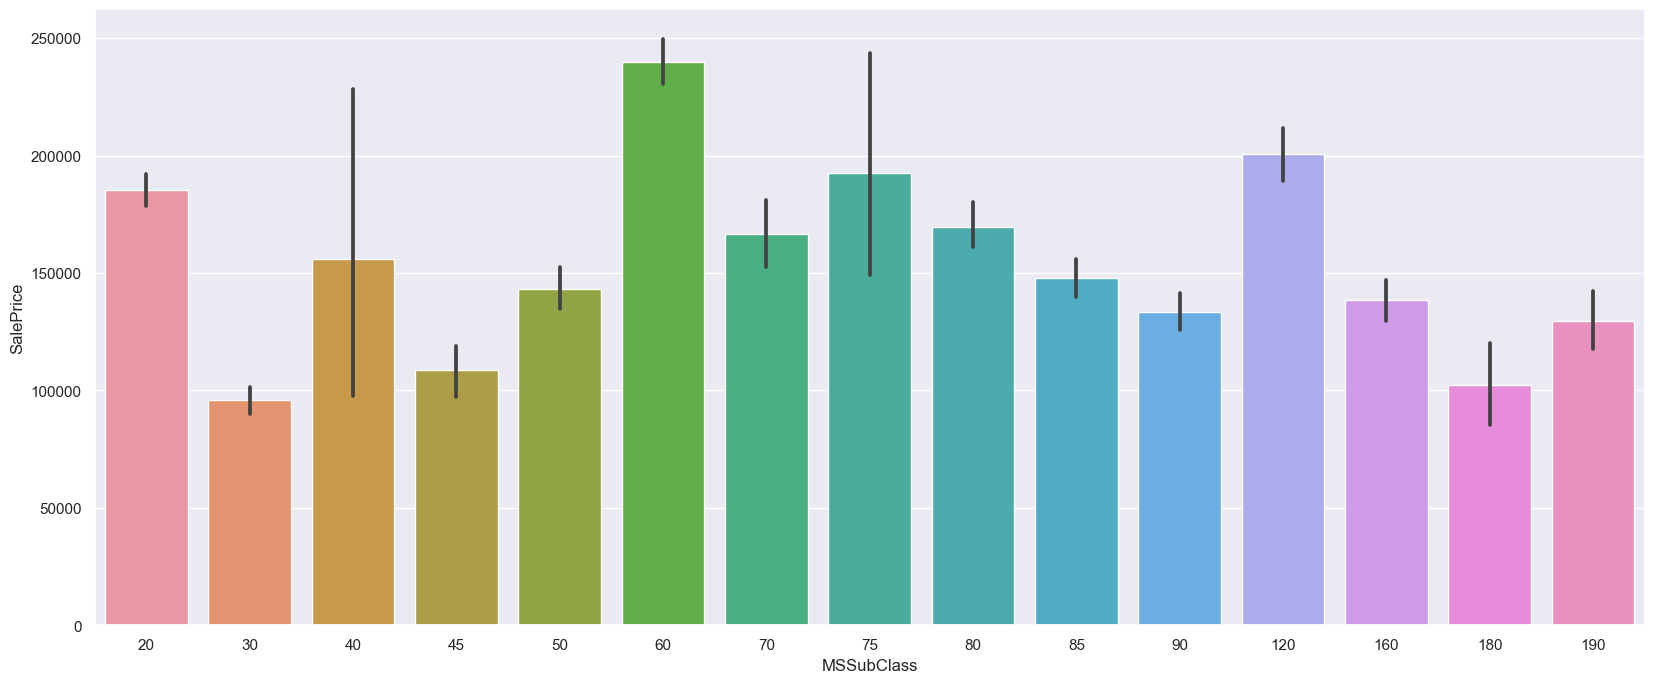

In [3516]:
plt.figure(figsize=(20, 8))
sns.barplot(x="MSSubClass", y="SalePrice", data= house_data)

#### Type of house is related to Sales Price. As expected Newer houses attract more SalePrice

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

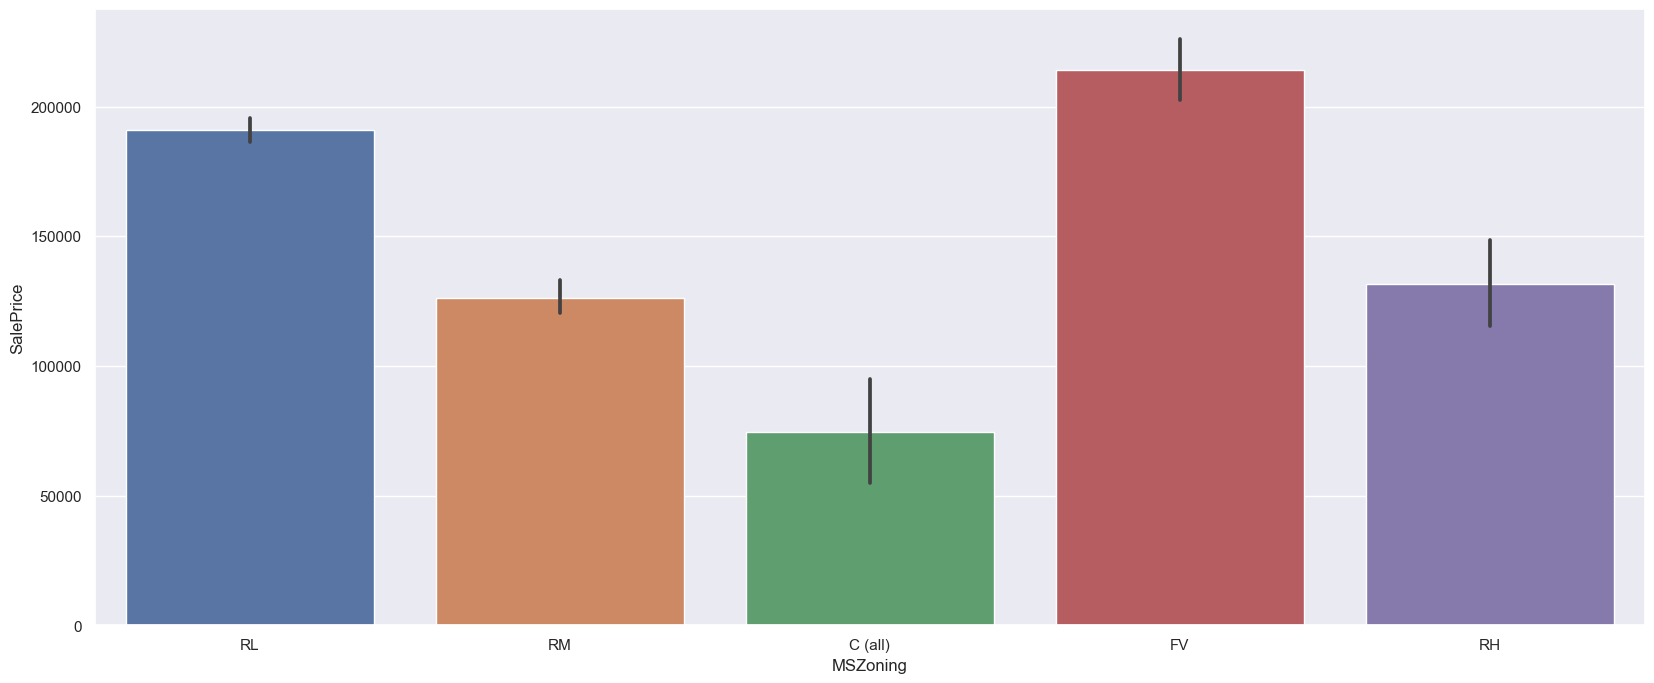

In [3517]:
plt.figure(figsize=(20, 8))
sns.barplot(x="MSZoning", y="SalePrice", data= house_data)

#### Houses at commercial area is having less price. Low density and Floating Village attract more price

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

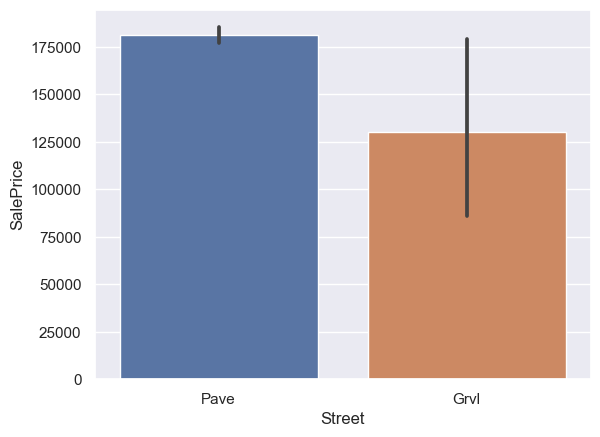

In [3518]:
sns.barplot(x="Street", y="SalePrice", data= house_data)

#### Houses having Pave access to street is expensive

<AxesSubplot:xlabel='Alley', ylabel='SalePrice'>

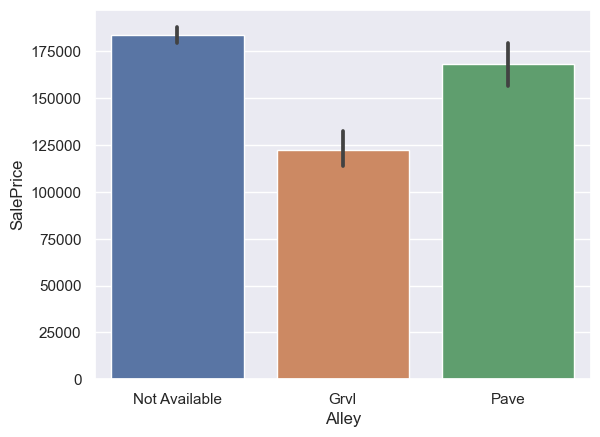

In [3519]:
sns.barplot(x="Alley", y="SalePrice", data= house_data)

<AxesSubplot:xlabel='Alley', ylabel='count'>

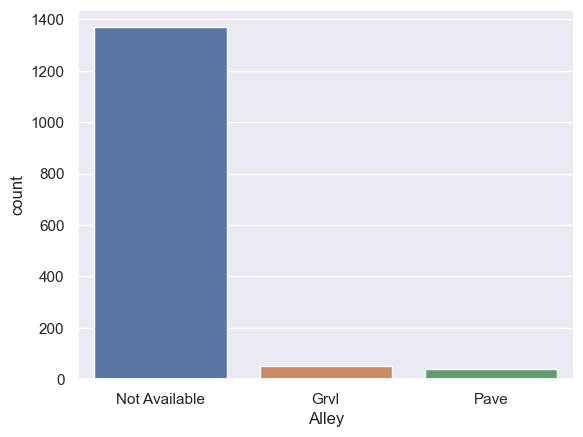

In [3520]:
sns.countplot(x=house_data["Alley"])

#### Majority of Alley information not available. So we will not be able to make use of this Variable. But from the so little given information it is clear that Pave access to Alley will have houses on expensive side

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

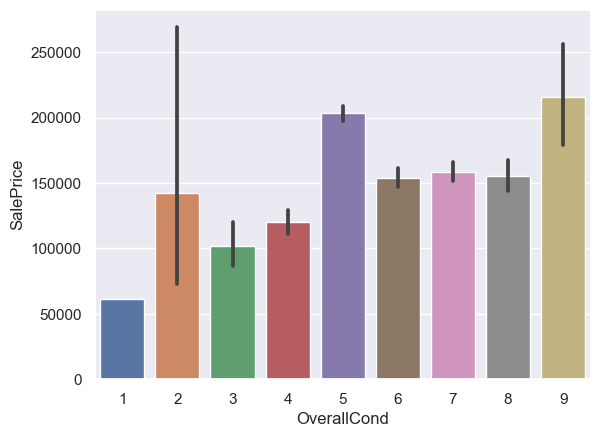

In [3521]:
sns.barplot(x="OverallCond", y="SalePrice", data= house_data)

#### Not able to clearly establish a relationship as even poor condition houses also showing relatively high salesprice

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

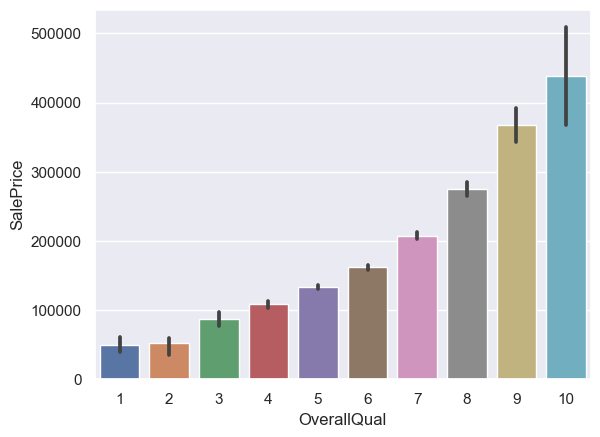

In [3522]:
sns.barplot(x="OverallQual", y="SalePrice", data= house_data)

#### Sale Price is positively correlated with Overall Quality

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

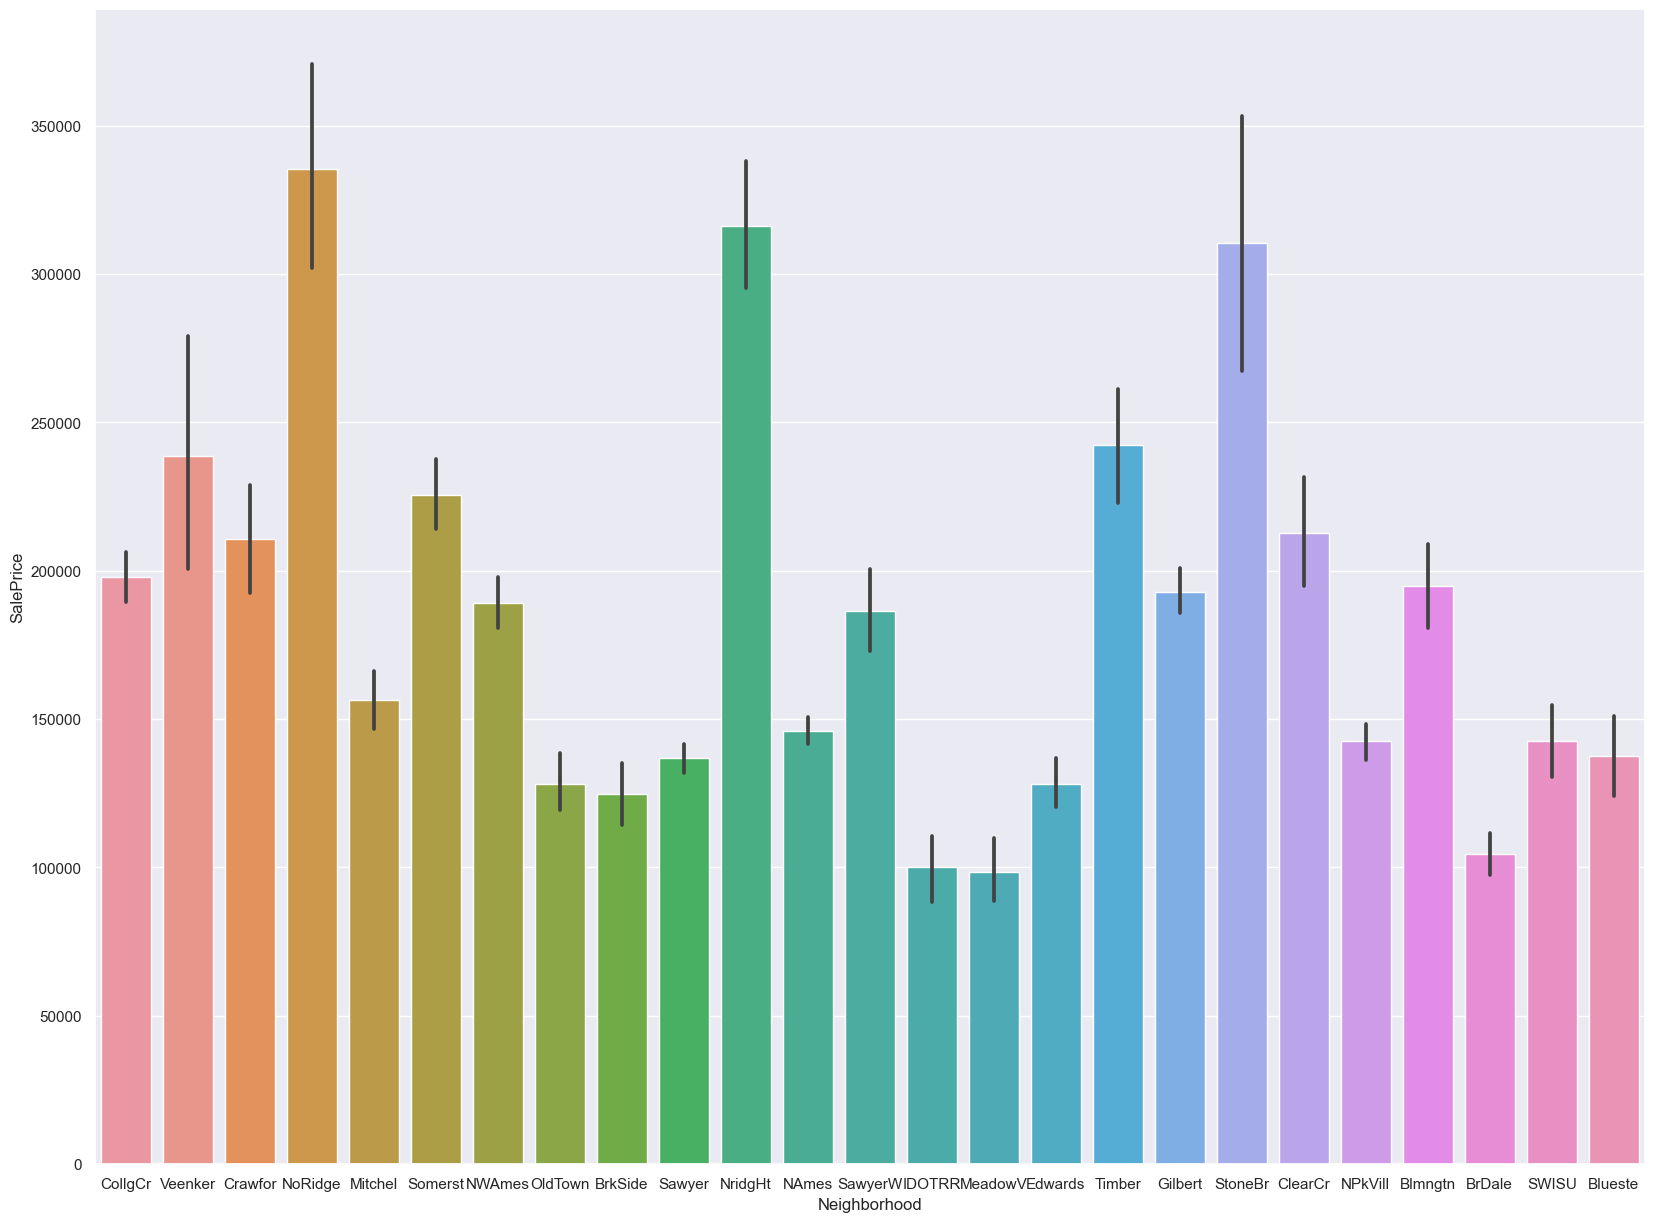

In [3523]:
plt.figure(figsize=(20, 15))
sns.barplot(x="Neighborhood", y="SalePrice", data= house_data)

#### Some Neighborhood hosts expensive houses

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

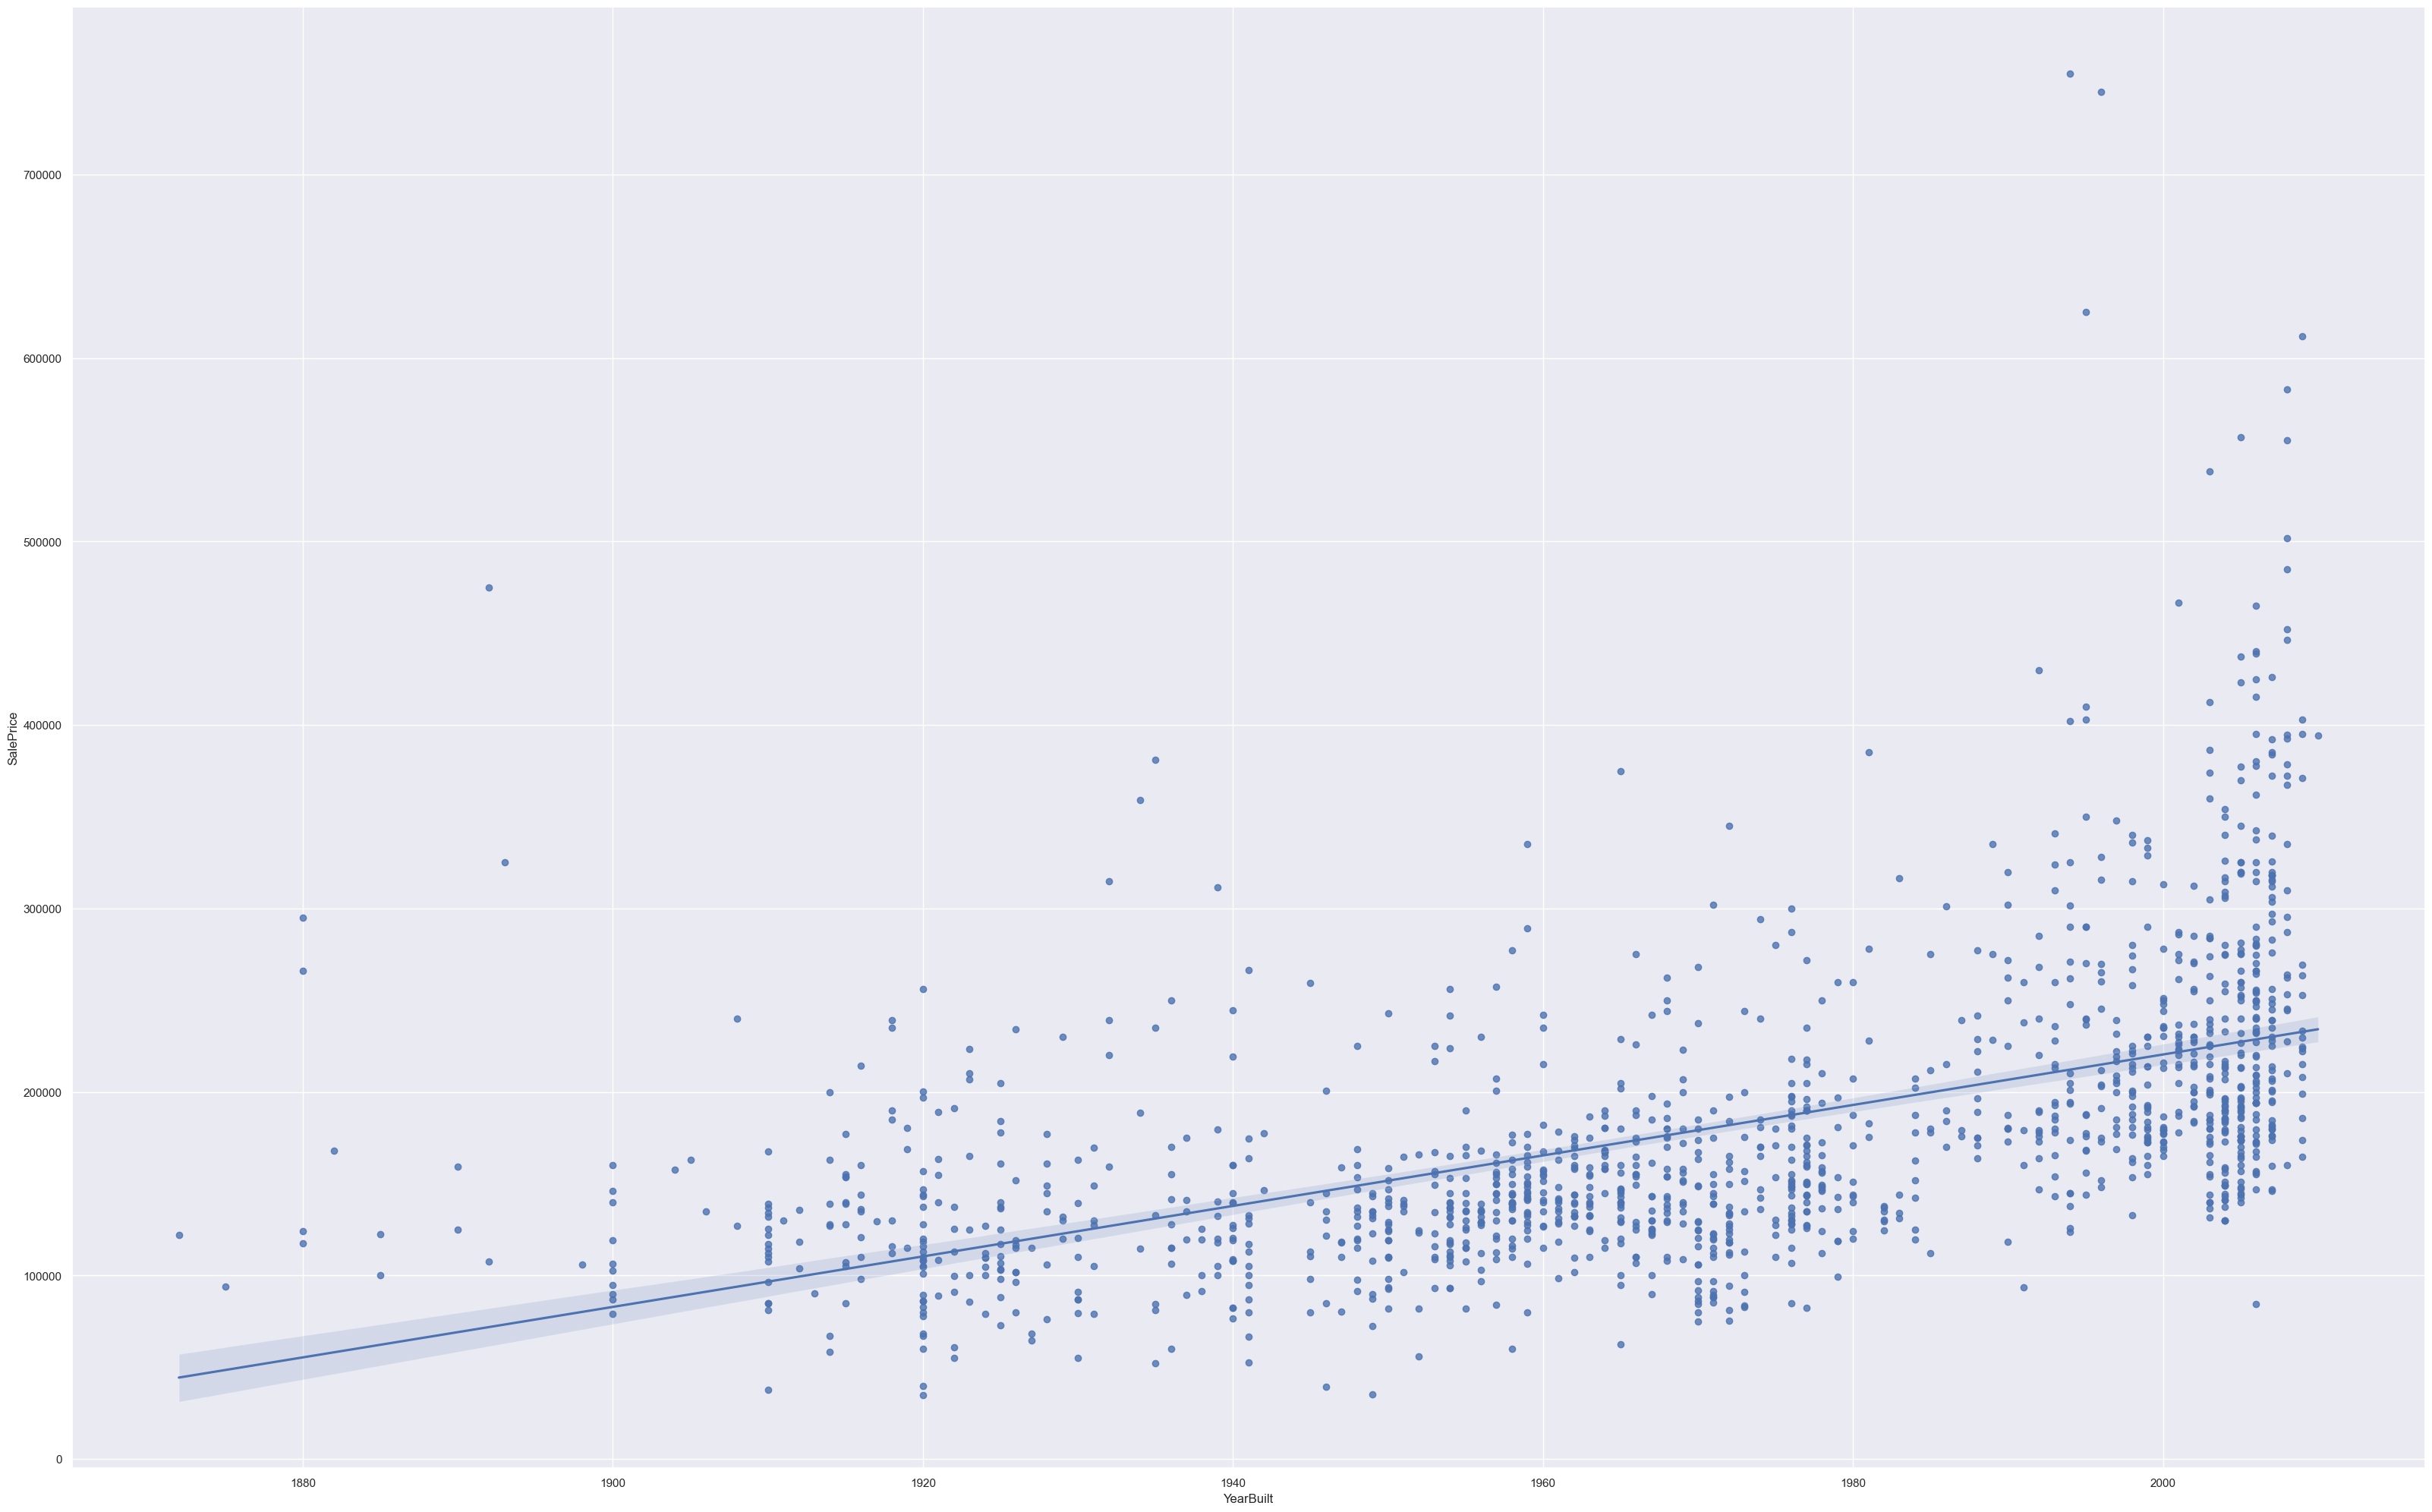

In [3524]:
plt.figure(figsize=(40, 25))
sns.regplot(x="YearBuilt", y="SalePrice", data= house_data)

#### Closer inspection we can see a linear relationship between YearBuilt and Sale Price

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

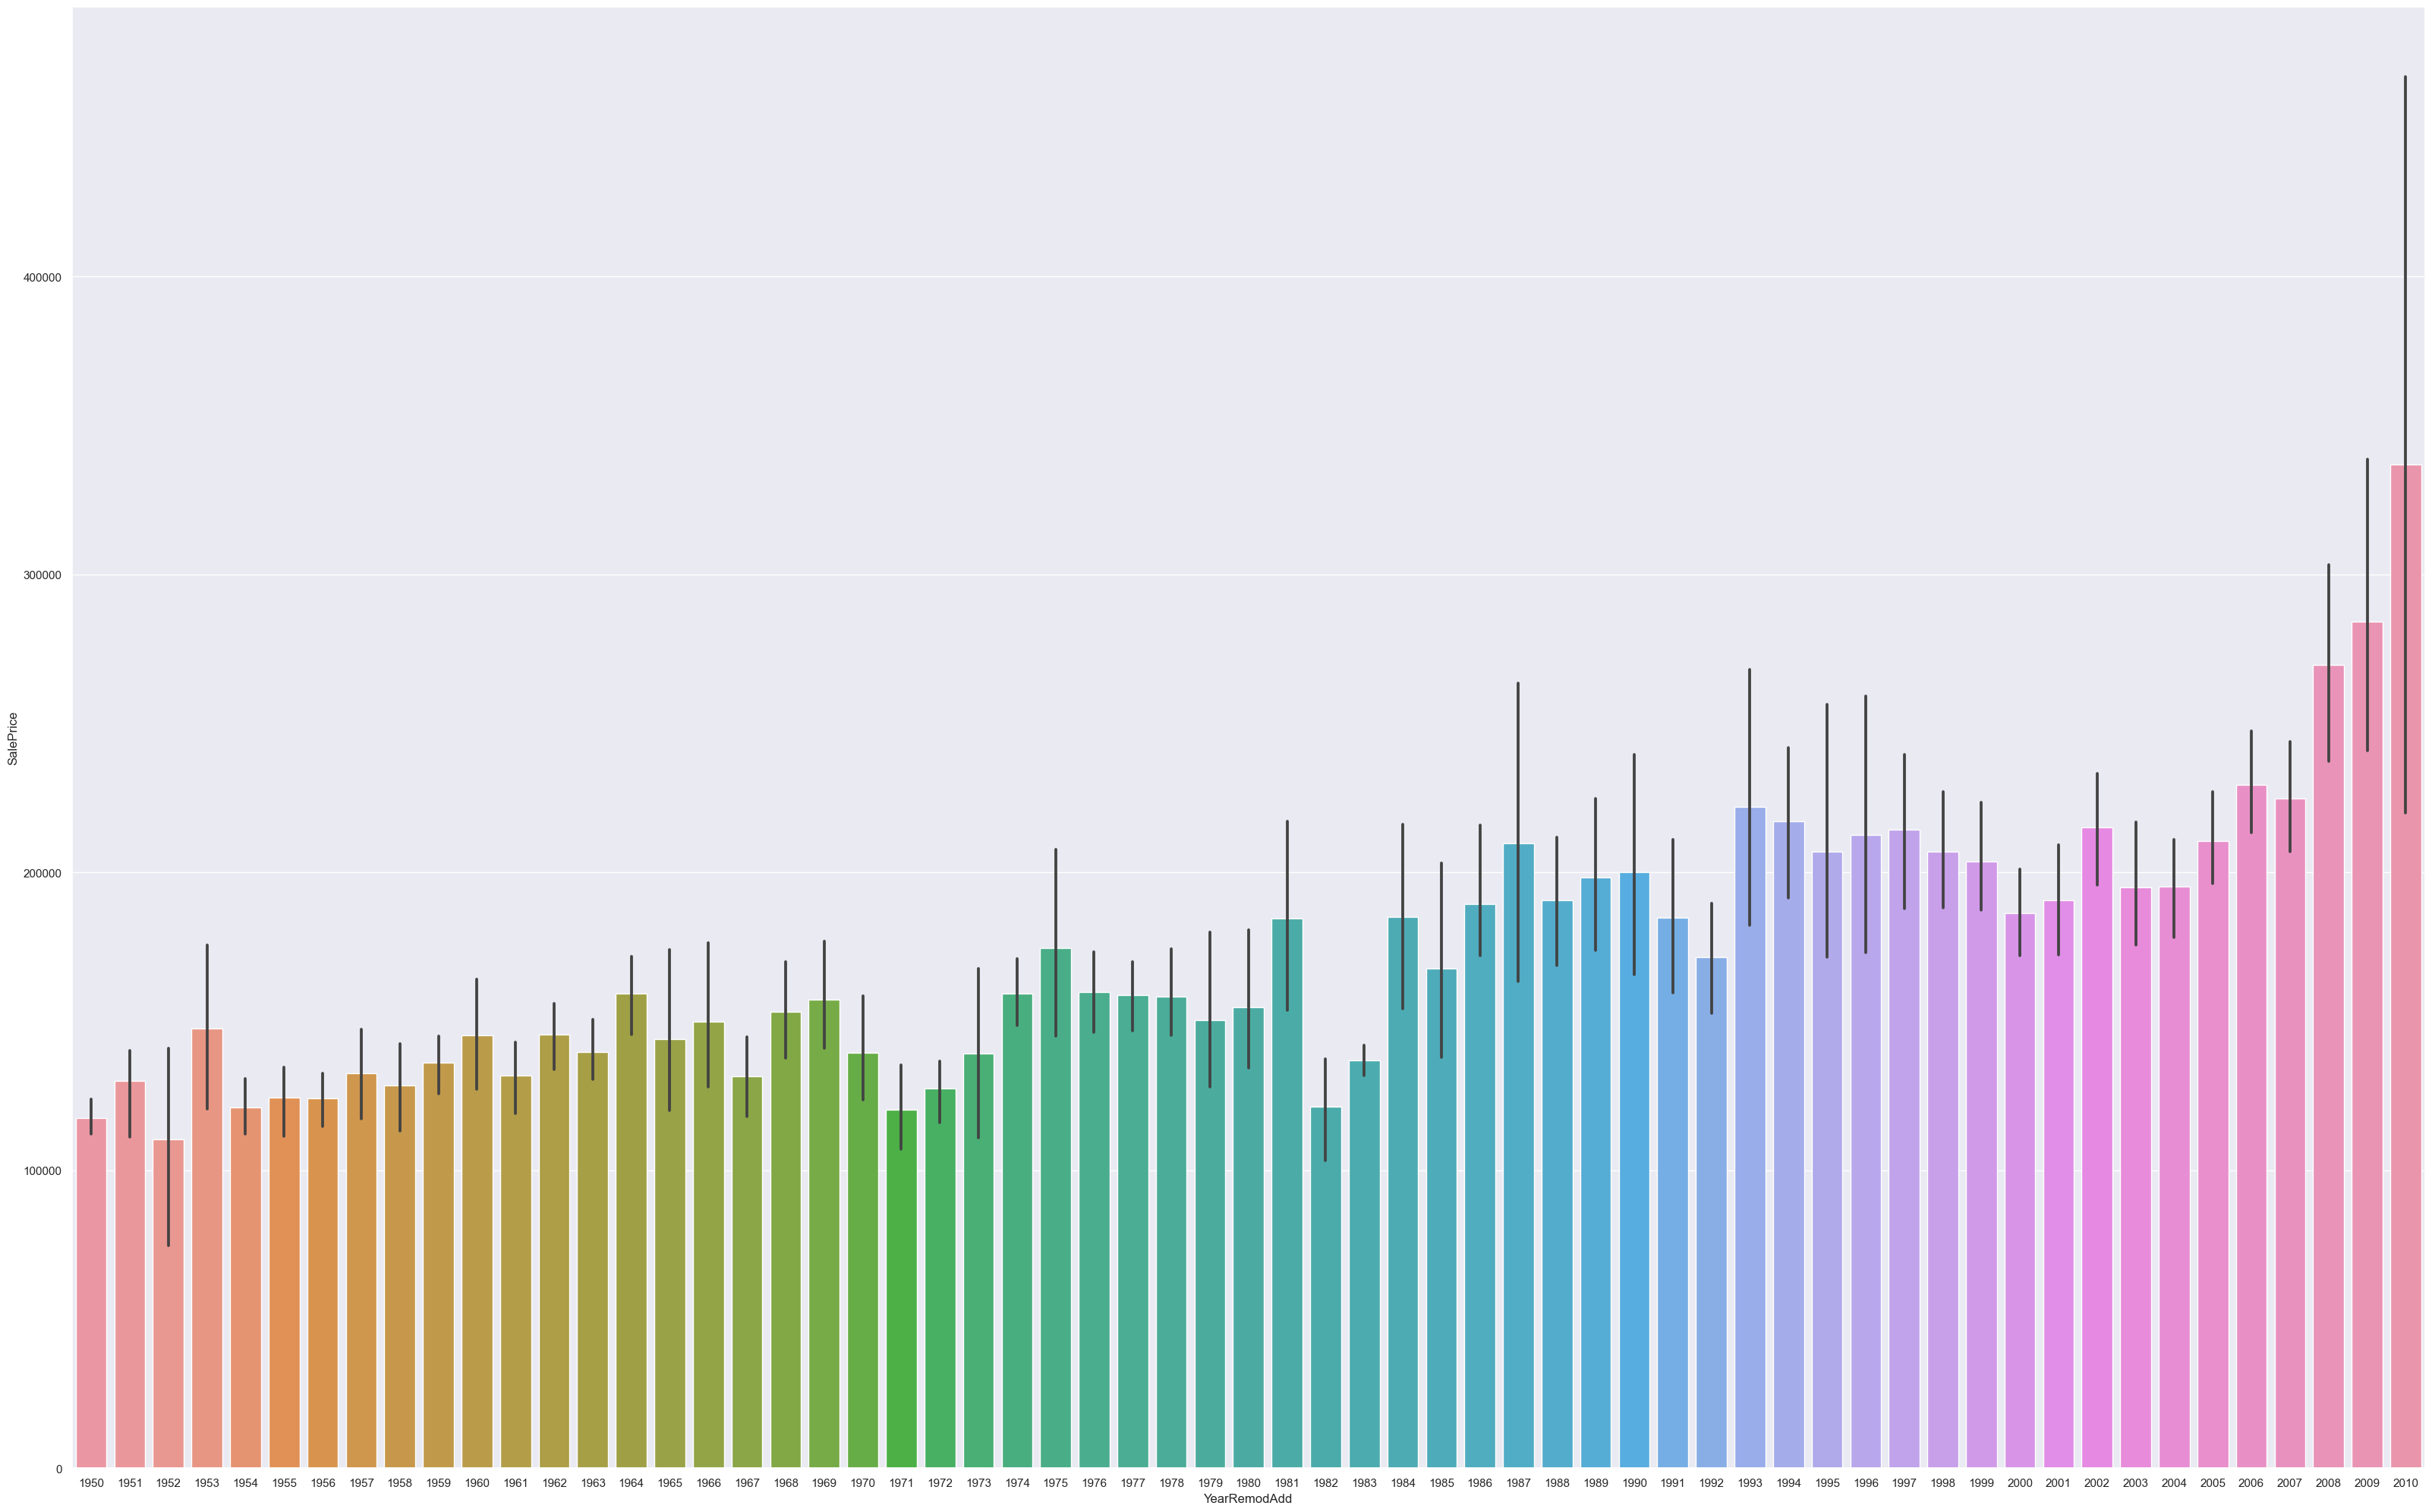

In [3525]:
plt.figure(figsize=(40, 25))
sns.barplot(x="YearRemodAdd", y="SalePrice", data= house_data)

<AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>

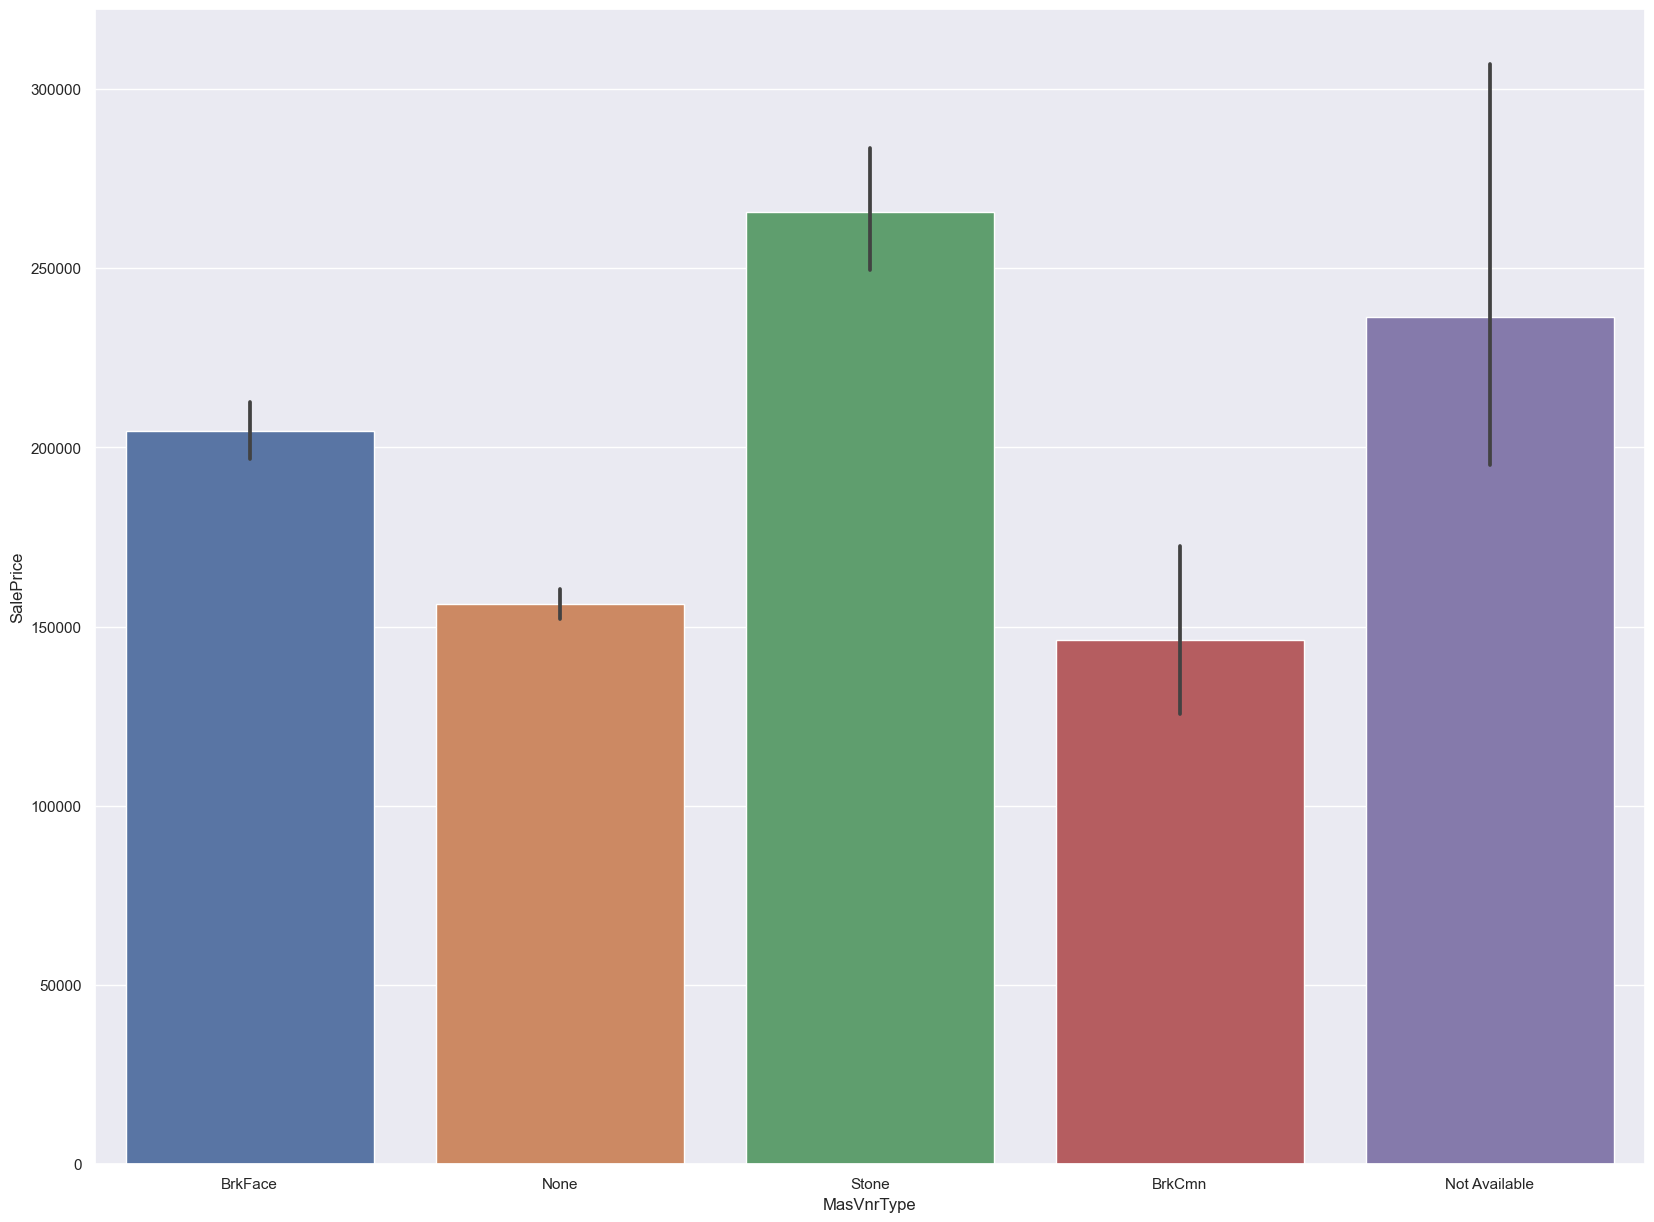

In [3526]:
plt.figure(figsize=(20, 15))
sns.barplot(x="MasVnrType", y="SalePrice", data= house_data)

#### Stone type houses are on expensive side

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

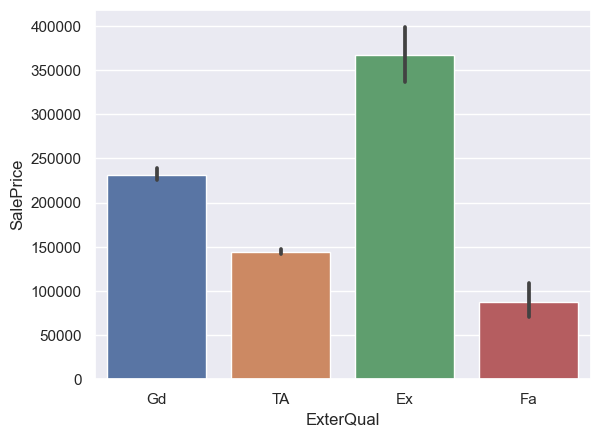

In [3527]:
sns.barplot(x="ExterQual", y="SalePrice", data= house_data)

#### As expected well maintained exterior attracts more price

<AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>

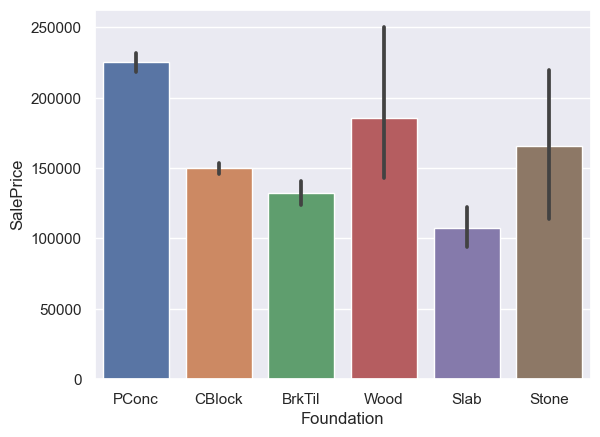

In [3528]:
sns.barplot(x="Foundation", y="SalePrice", data= house_data)

#### Concrete foundation is in demand

<AxesSubplot:xlabel='Heating', ylabel='SalePrice'>

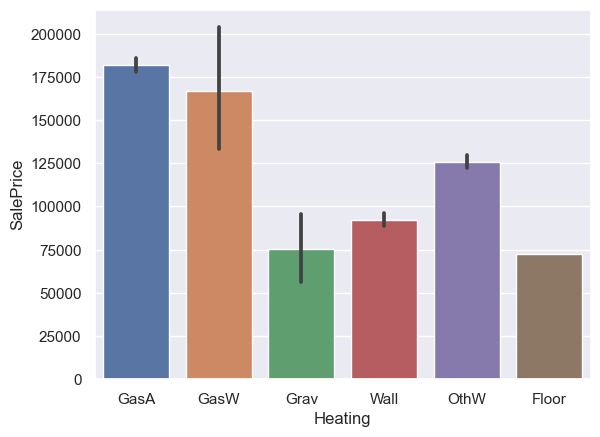

In [3529]:
sns.barplot(x="Heating", y="SalePrice", data= house_data)

#### Houses with Gas heaters are in demand

### Based on the EDA it is very clear that if the house, amenities, rooms and premises in good condition would attact higher sales price. This is exactly in line with our intuition

In [3530]:
rel = house_data_numeric.corr()
rel

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.370367 -0.139781     0.032628    -0.059316   
LotFrontage     -0.370367     1.000000  0.335957     0.239546    -0.043595   
LotArea         -0.139781     0.335957  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.239546  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.043595 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.120999  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.084550  0.013788     0.550684     0.073741   
MasVnrArea       0.023573     0.195830  0.103321     0.407252    -0.125694   
BsmtFinSF1      -0.069836     0.232576  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.052237  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.119174 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.381038  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.434109  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.075686  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.031873  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.385190  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.107226  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333     0.006620  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.186561  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.054190  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.245232  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.005627 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.332619  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.249295  0.271364     0.396765    -0.023820   
GarageYrBlt      0.081396     0.062380 -0.025865     0.514231    -0.306276   
GarageCars      -0.040110     0.281393  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.339085  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088736  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.141734  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.008057 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.064654  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041063  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.174567  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.005332  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.007370  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.004756 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.349876  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.023573   -0.069836   -0.065649   
LotFrontage     0.120999      0.084550    0.195830    0.232576    0.052237   
LotArea         0.014228      0.013788    0.103321    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.407252    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.125694   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.311600    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.176529    0.128451   -0.067759   
MasVnrArea      0.311600      0.176529    1.000000    0.261256   -0.071330   
BsmtFinSF1      0.249503      0.128451    0.261256    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.071330   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.113862   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.360067    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

#### Some variables are showing multicollinearity

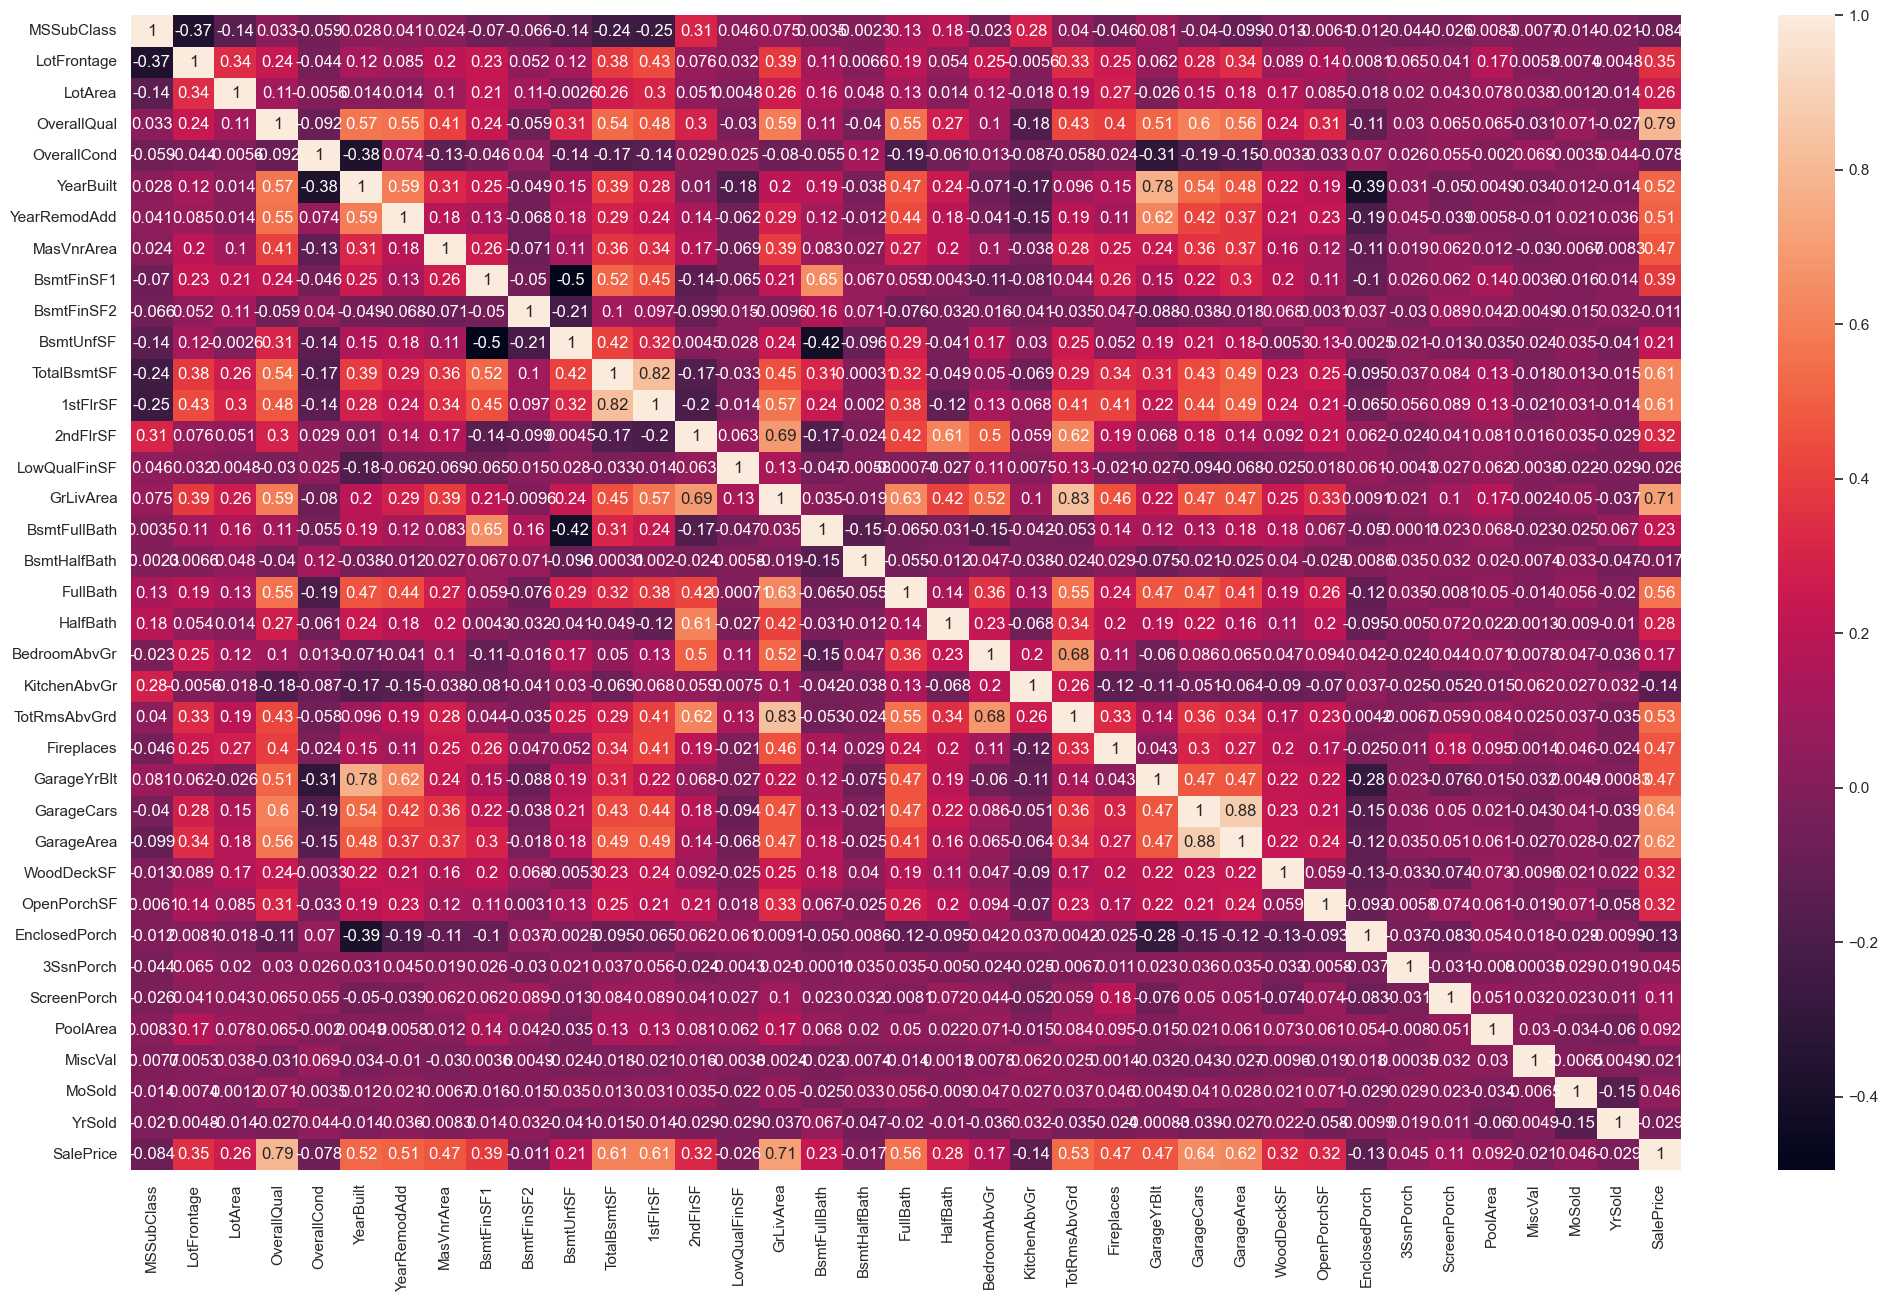

In [3531]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(25,15))

# heatmap
sns.heatmap(rel, annot=True)
plt.show()

#### It is very clear that some of the variables are highly correlated

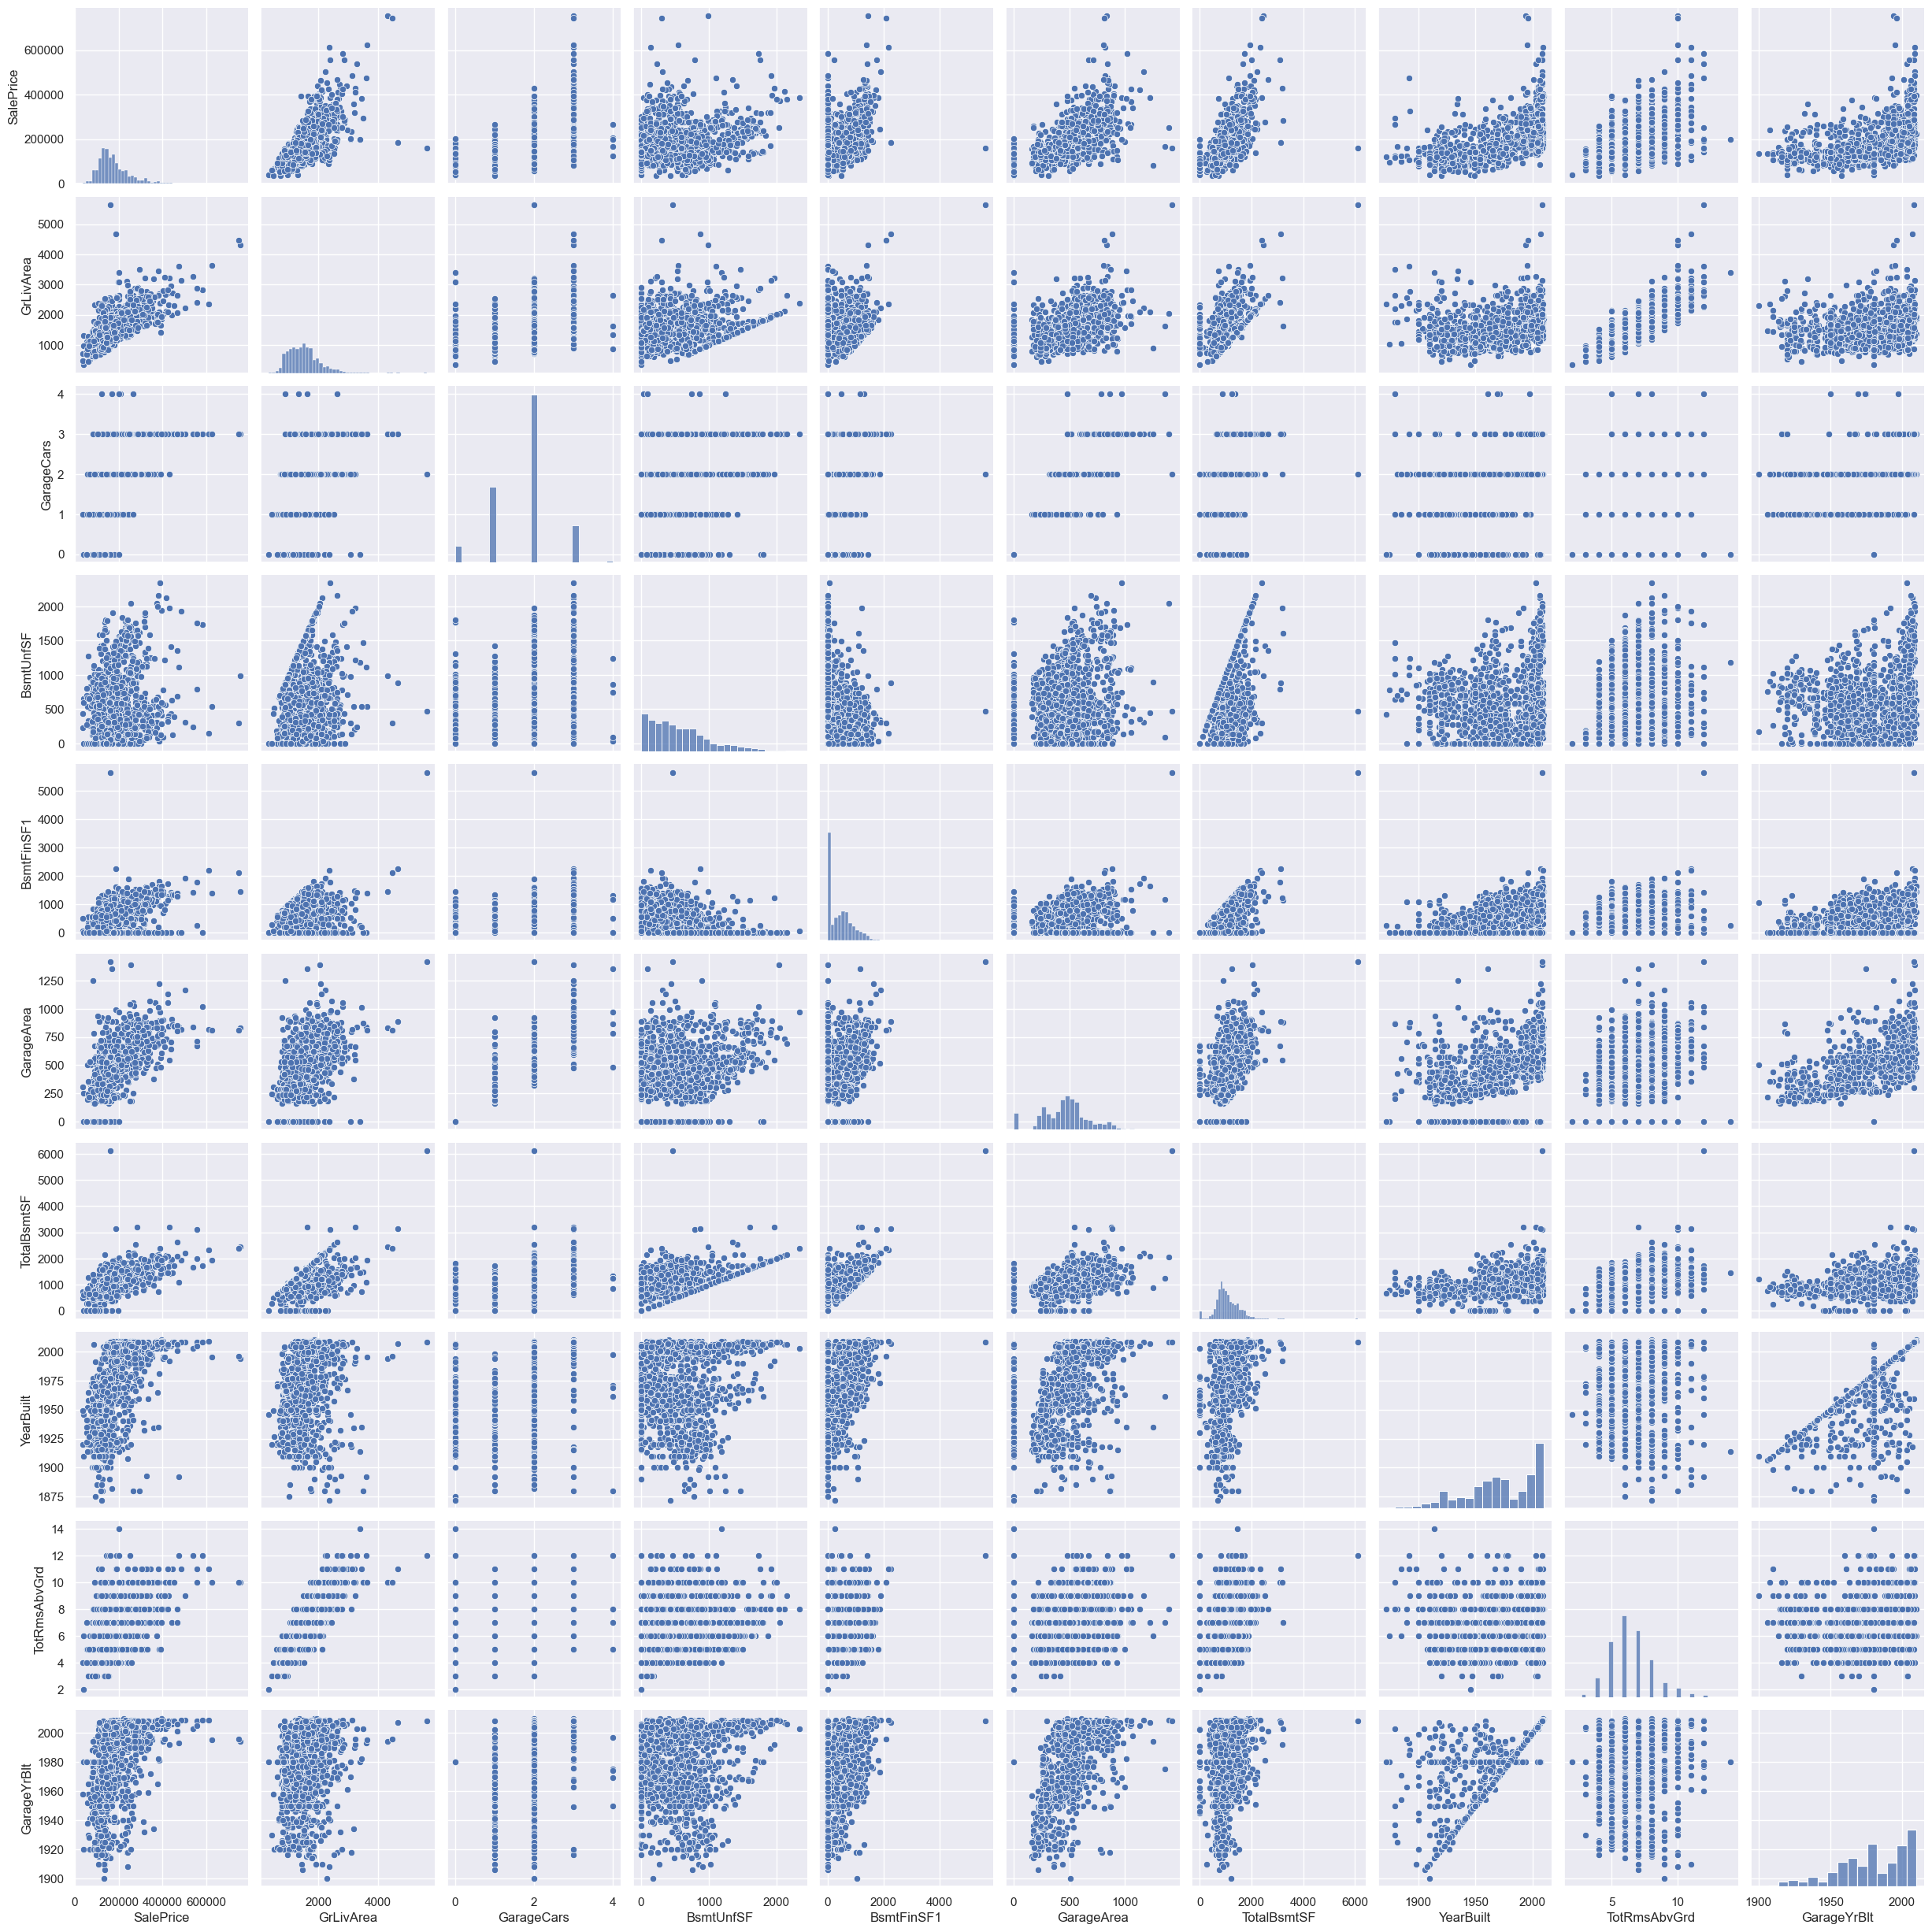

In [3532]:
# Checking pairplot for some variables where we suspect multicollinearity
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(house_data[cols], size = 2.5)
plt.show()

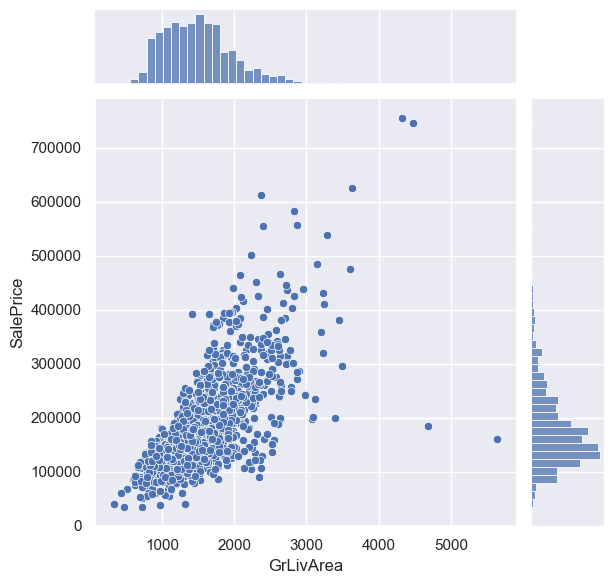

In [3533]:
sns.jointplot(x = house_data['GrLivArea'], y = house_data['SalePrice'])
plt.show()

#### There is a positive correlation between Sales Price and GrLivArea

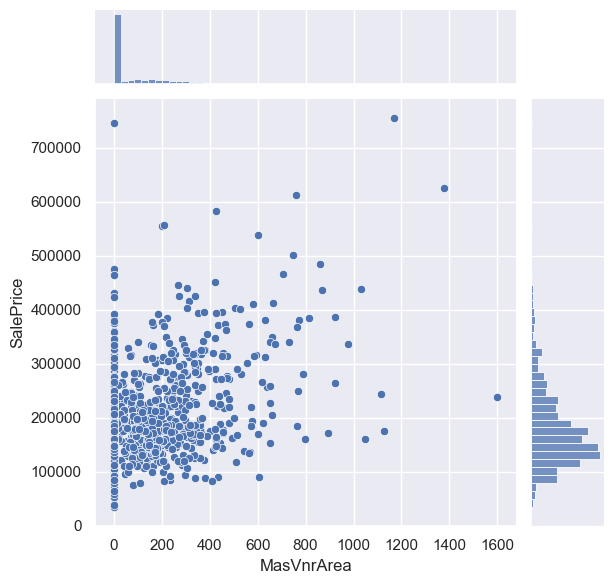

In [3534]:
sns.jointplot(x = house_data['MasVnrArea'], y = house_data['SalePrice'])
plt.show()

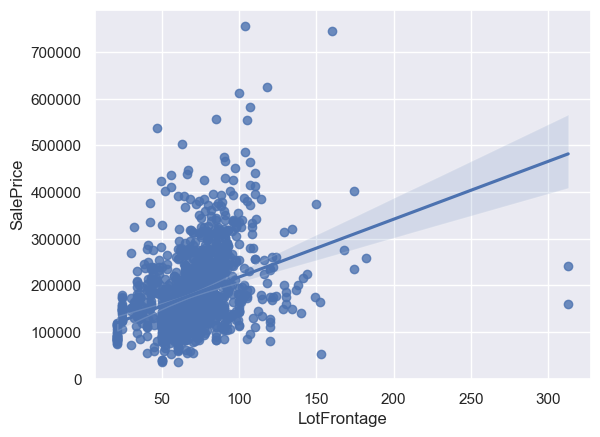

In [3535]:
sns.regplot(x = house_data['LotFrontage'], y = house_data['SalePrice'])
plt.show()

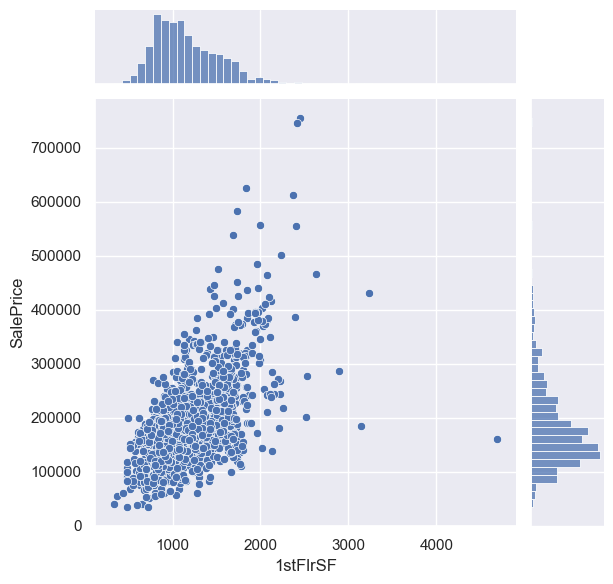

In [3536]:
sns.jointplot(x = house_data['1stFlrSF'], y = house_data['SalePrice'])
plt.show()

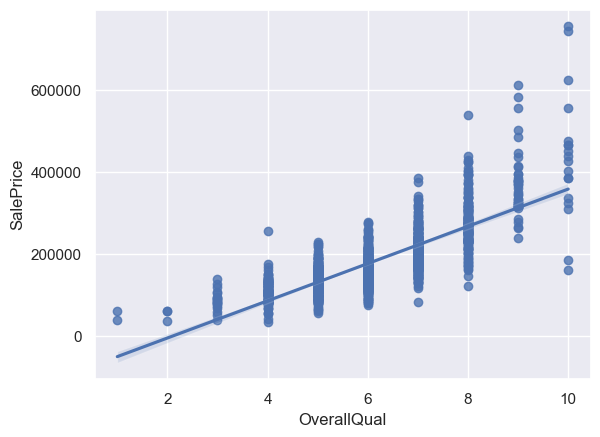

In [3537]:
sns.regplot(x = house_data['OverallQual'], y = house_data['SalePrice'])
plt.show()

#### We can create one derived variable from Year Sold and Year Built

In [3538]:
house_data['houseage'] = (house_data['YrSold'] - house_data['YearBuilt'])
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street          Alley LotShape  \
0          60       RL         65.0     8450   Pave  Not Available      Reg   
1          20       RL         80.0     9600   Pave  Not Available      Reg   
2          60       RL         68.0    11250   Pave  Not Available      IR1   
3          70       RL         60.0     9550   Pave  Not Available      IR1   
4          60       RL         84.0    14260   Pave  Not Available      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
0             1          Gd             8        Typ           0   
1             1          TA             6        Typ           1   
2             1          Gd             6        Typ           1   
3             1          Gd             7        Typ     

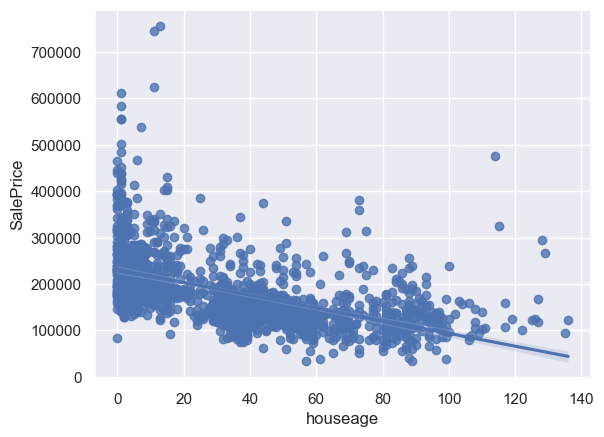

In [3539]:
sns.regplot(x = house_data['houseage'], y = house_data['SalePrice'])
plt.show()

#### Negative relationship between Age of the House and Sale Price

#### We can remove other columns related to Age of property at selling time

In [3540]:
house_data = house_data.drop(['MoSold'], axis = 1)
house_data = house_data.drop(['YrSold'], axis = 1)
house_data = house_data.drop(['YearBuilt'], axis = 1)
house_data = house_data.drop(['YearRemodAdd'], axis = 1)
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street          Alley LotShape  \
0          60       RL         65.0     8450   Pave  Not Available      Reg   
1          20       RL         80.0     9600   Pave  Not Available      Reg   
2          60       RL         68.0    11250   Pave  Not Available      IR1   
3          70       RL         60.0     9550   Pave  Not Available      IR1   
4          60       RL         84.0    14260   Pave  Not Available      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
0       Norm     1Fam     2Story            7            5     Gable  CompShg   
1       Norm     1Fam     1Story            6            8     Gable  CompShg   
2       Norm     1Fam     2Story            7            5     Gable  CompShg   
3       Norm     1Fam     2Story            7            5     Gable  CompShg   
4       Norm     1Fam     2Story            8            5     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces    FireplaceQu GarageType  \
0          Gd             8        Typ           0  Not Available     Attchd   
1          TA             6        Typ           1             TA     Attchd   
2          Gd             6        Typ           1             TA     Attchd   
3          Gd             7        Typ           1             Gd     Detch

#### Number of values in Street and Utilities variable are less so we can drop these variables also

In [3541]:
house_data = house_data.drop(['Street'], axis = 1)
house_data = house_data.drop(['Utilities'], axis = 1)

In [3542]:
house_data = house_data.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1)

In [3543]:
house_data.shape

(1460, 67)

In [3544]:
house_data = house_data[['MSSubClass','MSZoning','LotFrontage','LotArea','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','TotalBsmtSF','HeatingQC','CentralAir','Electrical','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','Fireplaces','FireplaceQu','GarageType','GarageFinish','GarageArea','GarageQual','PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscFeature','SaleType','SaleCondition','SalePrice','log_SalePrice','houseage']]

In [3545]:
house_data.shape

(1460, 63)

In [3546]:
house_data_bkp = house_data

### Data Preparation

#### Creating dummy variables for Categorical

In [3547]:
house_data = pd.get_dummies(house_data, drop_first=True )
house_data.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         706           0          856       856       854             0   
1         978           0         1262      1262         0             0   
2         486           0          920       920       866             0   
3         216           0          756       961       756             0   
4         655           0         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
0             1           0         548           0           61   
1             1           1         460         298            0   
2             1           1         608           0           42   
3             1           1         642           0           35   
4             1           1         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  SalePrice  log_SalePrice  \
0              0          0            0         0     208500      12.247699   
1              0          0            0         0     181500      12.109016   
2              0          0            0         0     223500      12.317171   
3            272          0            0         0     140000      11.849405   
4              0          0            0         0     250000      12.429220   

   houseage  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0         5            0            0            1            0             0   
1        31            0            0            1            0             0   
2         7            0            0            1            0             0   
3        91            0            0            1            0             0   
4         8            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                1                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0                 1              0              0                     0   
1                 0              0              0                     0   
2                 1              0              0                     0   
3                 0              0              0                     0   
4                 0             

In [3548]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
house_data.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         706           0          856       856       854             0   
1         978           0         1262      1262         0             0   
2         486           0          920       920       866             0   
3         216           0          756       961       756             0   
4         655           0         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
0             1           0         548           0           61   
1             1           1         460         298            0   
2             1           1         608           0           42   
3             1           1         642           0           35   
4             1           1         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  SalePrice  log_SalePrice  \
0              0          0            0         0     208500      12.247699   
1              0          0            0         0     181500      12.109016   
2              0          0            0         0     223500      12.317171   
3            272          0            0         0     140000      11.849405   
4              0          0            0         0     250000      12.429220   

   houseage  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0         5            0            0            1            0             0   
1        31            0            0            1            0             0   
2         7            0            0            1            0             0   
3        91            0            0            1            0             0   
4         8            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                1                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0                 1              0              0                     0   
1                 0              0              0                     0   
2                 1              0              0                     0   
3                 0              0              0                     0   
4                 0             

In [3549]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
print(house_data.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=213)


In [3550]:
house_data.shape

(1460, 213)

#### Create Explanatory variables X

In [3551]:
X = house_data.drop(['log_SalePrice','SalePrice'], axis=1)

X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         706           0          856       856       854             0   
1         978           0         1262      1262         0             0   
2         486           0          920       920       866             0   
3         216           0          756       961       756             0   
4         655           0         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
0             1           0         548           0           61   
1             1           1         460         298            0   
2             1           1         608           0           42   
3             1           1         642           0           35   
4             1           1         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  houseage  MSZoning_FV  \
0              0          0            0         0         5            0   
1              0          0            0         0        31            0   
2              0          0            0         0         7            0   
3            272          0            0         0        91            0   
4              0          0            0         0         8            0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
0            0            1            0             0             0   
1            0            1            0             0             0   
2            0            1            0             0             0   
3            0            1            0             0             0   
4            0            1            0             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   
1             1                0                0                1   
2             0                0                0                1   
3             0                0                0                1   
4             0                0                0                1   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0              0                     0                    0   
1              0              0                     0                    0   
2              0              0                     0                    0   
3              0              0                     0                    0   
4              0              0                     0            

#### Creating Response Variable Y

In [3552]:
y = house_data['log_SalePrice']

y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: log_SalePrice, dtype: float64

#### Splitting data into train and test

In [3553]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [3554]:
scaler = StandardScaler()

X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'houseage']])

X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'houseage']])
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
175    -0.870387     0.612765  0.166080    -0.059996     1.252715   -0.575015   
1408    0.304785    -0.432534 -0.261043    -1.501313     1.252715   -0.575015   
1148   -0.165284    -0.432534 -0.439778     0.660663     1.252715   -0.575015   
861     3.125199     0.220778  0.079341    -0.780655    -1.406374   -0.575015   
220    -0.870387     0.133670 -0.151525     0.660663    -0.520011   -0.575015   

      BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
175     0.085426   -0.283127     0.347365  2.572160 -0.797551     -0.121406   
1408   -0.943351   -0.283127    -0.973680 -1.069794  0.630928     -0.121406   
1148   -0.943351   -0.283127    -1.087563 -1.504156  0.440311     -0.121406   
861     0.870488   -0.283127    -0.023894 -0.303879 -0.797551     -0.121406   
220    -0.943351   -0.283127     1.021554  0.875837 -0.797551     -0.121406   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
175    1.229791      1.105326     -0.232279  0.786946 -0.751723      1.407703   
1408  -0.279140     -0.807450     -0.232279 -1.006519 -0.751723      0.176114   
1148  -0.757443     -0.807450     -0.232279 -1.006519 -0.751723     -1.055475   
861   -0.894101      1.105326     -0.232279 -1.006519  1.246998      0.176114   
220   -0.022906     -0.807450     -0.232279  0.786946 -0.751723     -1.055475   

      KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
175      -0.212991    0.622339    0.478002   -0.740805    -0.261563   
1408     -0.212991   -0.935034    0.256615   -0.740805    -0.721923   
1148     -0.212991    0.622339   -0.850325   -0.740805    -0.721923   
861      -0.212991   -0.935034    0.145921   -0.740805    -0.721923   
220      -0.212991   -0.935034    0.934615    2.124358    -0.198065   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  houseage  MSZoning_FV  \
175        0.282917  -0.110736    -0.260661 -0.062302        57            0   
1408      -0.358041  -0.110736     3.016768 -0.062302       100            0   
1148       2.534487  -0.110736    -0.260661 -0.062302        82            0   
861       -0.358041  -0.110736    -0.260661 -0.062302        45            0   
220       -0.358041  -0.110736    -0.260661 -0.062302         0            0   

      MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
175             0            1            0             0             0   
1408            0            0            1             0             0   
1148            0            0            1             0             0   
861             0            1            0             0             0   
220             0            1            0             0             0   

      LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
175              1                0                0                1   
1408             1                0                0                1   
1148             1                0                0                1   
861              1                0                0                1   
220              0                0                0                1   

      LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
175                   0              0              0                 0   
1408                  0              0              0                 1   
1148                  0              0              0                 1   
861                   0              0              0                 1   
220                   0              0              0                 1   

      LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
175               0              0                     0                    0   
1408              0              0                     0                    0   
1148              0              0                     0         

In [3555]:
X_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
930    -0.879672     0.106932 -0.211538     1.358461    -0.509551   -0.560080   
530     0.559791     0.676372  0.029981    -0.099887    -0.509551    0.597117   
1291    2.479076    -2.360638 -1.583933    -0.829061     1.350309    0.856033   
1385   -0.159940    -1.459026 -0.872447    -1.558235     2.280239   -0.560080   
305    -0.879672     0.439105  0.065215     1.358461    -0.509551    0.739785   

      BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
930    -1.009468   -0.301886     0.899165  0.771223 -0.791130     -0.119344   
530     0.743814   -0.301886     0.887692  0.884656 -0.791130     -0.119344   
1291   -0.518001   -0.301886    -1.019124 -1.434127  0.740428     -0.119344   
1385    0.634091   -0.301886    -0.638220 -0.996222  0.024789     -0.119344   
305     2.300508   -0.301886     2.124484  2.179903 -0.791130     -0.119344   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
930   -0.117457     -0.851855     -0.261329  0.798671 -0.786336      0.135738   
530   -0.035051      1.111895     -0.261329  0.798671 -0.786336      0.135738   
1291  -0.431748     -0.851855     -0.261329  0.798671  1.181751      0.135738   
1385  -0.715377      1.111895     -0.261329 -1.072013 -0.786336      0.135738   
305    0.905907      1.111895     -0.261329  0.798671 -0.786336      0.135738   

      KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
930      -0.208108   -0.987888    0.657098   -0.019795    -0.427207   
530      -0.208108    0.551952    0.608692    0.924930    -0.673305   
1291     -0.208108   -0.987888   -1.017758    0.627799    -0.673305   
1385     -0.208108   -0.987888   -1.133933   -0.781670     0.639219   
305      -0.208108   -0.987888    2.002793    0.498280    -0.673305   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  houseage  MSZoning_FV  \
930       -0.362773  -0.128962    -0.293788 -0.082098         2            0   
530       -0.362773  -0.128962    -0.293788 -0.082098        20            0   
1291      -0.362773  -0.128962    -0.293788 -0.082098        37            0   
1385      -0.362773  -0.128962    -0.293788 -0.082098        88            0   
305       -0.362773  -0.128962    -0.293788 -0.082098         3            0   

      MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
930             0            1            0             0             0   
530             0            1            0             0             0   
1291            0            0            1             0             0   
1385            0            0            1             0             0   
305             0            1            0             0             0   

      LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
930              0                1                0                0   
530              1                0                0                1   
1291             1                0                0                1   
1385             1                0                0                1   
305              1                0                0                1   

      LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
930                   0              0              0                 1   
530                   0              0              0                 1   
1291                  0              0              0                 1   
1385                  0              0              0                 1   
305                   0              0              0                 1   

      LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
930               0              0                     0                    0   
530               0              0                     0                    0   
1291              0              0                     0         

### Model Building

In [3556]:
# initiating linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [3557]:
# Since the number of variables are high, let us use RFE

rfe = RFE(lm, step = 100)            
rfe = rfe.fit(X_train, y_train)

In [3558]:
for i in range(X_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 3.000
Column: 1, Selected False, Rank: 3.000
Column: 2, Selected False, Rank: 3.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 3.000
Column: 6, Selected False, Rank: 3.000
Column: 7, Selected False, Rank: 3.000
Column: 8, Selected False, Rank: 3.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected False, Rank: 3.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected False, Rank: 3.000
Column: 14, Selected False, Rank: 3.000
Column: 15, Selected False, Rank: 3.000
Column: 16, Selected False, Rank: 3.000
Column: 17, Selected False, Rank: 3.000
Column: 18, Selected False, Rank: 3.000
Column: 19, Selected False, Rank: 3.000
Column: 20, Selected False, Rank: 3.000
Column: 21, Selected False, Rank: 3.000
Column: 22, Selected False, Rank: 3.000
Column: 23, Selected False, Rank: 3.000
Column: 24, Selected False, Rank: 3.000
Column: 25, Sel

In [3559]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 3),
 ('LotFrontage', False, 3),
 ('LotArea', False, 3),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 3),
 ('BsmtFinSF1', False, 3),
 ('BsmtFinSF2', False, 3),
 ('TotalBsmtSF', False, 3),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 3),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 3),
 ('BsmtHalfBath', False, 3),
 ('FullBath', False, 3),
 ('HalfBath', False, 3),
 ('BedroomAbvGr', False, 3),
 ('KitchenAbvGr', False, 3),
 ('Fireplaces', False, 3),
 ('GarageArea', False, 3),
 ('WoodDeckSF', False, 3),
 ('OpenPorchSF', False, 3),
 ('EnclosedPorch', False, 3),
 ('3SsnPorch', False, 3),
 ('ScreenPorch', False, 3),
 ('PoolArea', False, 3),
 ('houseage', False, 3),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 3),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 3),
 ('LandContour_HLS', False, 3),
 ('LandContour_Low', 

In [3560]:
# Selected columns
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR3',
       ...
       'MiscFeature_Shed', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD',
       'SaleType_New', 'SaleType_Oth', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=106)

In [3561]:
# Rejected columns
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'TotalBsmtSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath',
       ...
       'GarageQual_TA', 'PavedDrive_P', 'PavedDrive_Y',
       'MiscFeature_Not Available', 'MiscFeature_TenC', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_WD', 'SaleCondition_Family', 'PropAge'],
      dtype='object', length=106)

In [3562]:
# Creating a new train X with selected columns

X_train_rfe = pd.DataFrame(X_train[col])

In [3563]:
X_train_rfe.head()

OverallQual  OverallCond  1stFlrSF  2ndFlrSF  GrLivArea  MSZoning_FV  \
175     -0.059996     1.252715  2.572160 -0.797551   1.229791            0   
1408    -1.501313     1.252715 -1.069794  0.630928  -0.279140            0   
1148     0.660663     1.252715 -1.504156  0.440311  -0.757443            0   
861     -0.780655    -1.406374 -0.303879 -0.797551  -0.894101            0   
220      0.660663    -0.520011  0.875837 -0.797551  -0.022906            0   

      MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR3  LotConfig_FR3  \
175             0            1            0             0              0   
1408            0            0            1             0              0   
1148            0            0            1             0              0   
861             0            1            0             0              0   
220             0            1            0             0              0   

      LandSlope_Sev  Neighborhood_Blueste  Neighborhood_CollgCr  \
175               0                     0                     0   
1408              0                     0                     0   
1148              0                     0                     0   
861               0                     0                     0   
220               0                     0                     1   

      Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
175                      0                     1                     0   
1408                     0                     0                     0   
1148                     0                     0                     0   
861                      0                     0                     0   
220                      0                     0                     0   

      Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
175                     0                     0                     0   
1408                    0                     0                     0   
1148                    0                     0                     0   
861                     0                     0                     0   
220                     0                     0                     0   

      Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
175                    0                     0                    0   
1408                   0                     0                    0   
1148                   0                     0                    0   
861                    0                     0                    0   
220                    0                     0                    0   

      Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
175                      0                     0                     0   
1408                     0                     0                     1   
1148                     0                     0                     1   
861                      0                     0                     0   
220                      0                     0                     0   

      Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_StoneBr  \
175                     0                     0                     0   
1408                    0                     0                     0   
1148                    0                     0                     0   
861                     1                     0                     0   
220                     0                     0                     0   

      Condition1_Norm  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  \
175                 1                0                0                0   
1408                1                0                0                0   
1148                1                0                0                0   
861                 1                0                0                0   
220                 1                0                0                0   

      Condition1_RRNn  Bl

In [3564]:
X_train_rfe.shape

(1021, 106)

In [3565]:
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9277652954573824

In [3566]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

0.8594214935641091

### It is clear that the model has overfitted as the test score is significantly lower than Train score

#### We need to look for alternate approaches to improve the model performance. We need to use regularization to optimize the model further

### Lasso Regression ( L1 Regularization )

In [3567]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1021, 212)
y_train (1021,)


In [3568]:
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = parameters, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [3569]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.155282      0.004540         0.000900        0.001561      0.0001   
1        0.039303      0.006923         0.006422        0.004700       0.001   
2        0.004314      0.005285         0.007304        0.007102        0.01   
3        0.007329      0.008513         0.000000        0.000000        0.05   
4        0.011511      0.003465         0.002389        0.003187         0.1   
5        0.004868      0.006358         0.003392        0.004917         0.2   
6        0.010548      0.001012         0.004768        0.000389         0.3   
7        0.010979      0.000934         0.003596        0.000626         0.4   
8        0.007996      0.007021         0.003123        0.006246         0.5   
9        0.012566      0.006301         0.000000        0.000000         0.6   
10       0.007348      0.006304         0.007487        0.006738         0.7   
11       0.012201      0.006134         0.000548        0.001096         0.8   
12       0.008697      0.007211         0.007970        0.007789         0.9   
13       0.018415      0.003483         0.001614        0.003227         1.0   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}           0.854920           0.908836   
1    {'alpha': 0.001}           0.878791           0.911165   
2     {'alpha': 0.01}           0.872845           0.877475   
3     {'alpha': 0.05}           0.811058           0.770062   
4      {'alpha': 0.1}           0.710203           0.636497   
5      {'alpha': 0.2}           0.456903           0.371115   
6      {'alpha': 0.3}           0.368287           0.269033   
7      {'alpha': 0.4}           0.367122           0.270415   
8      {'alpha': 0.5}           0.365832           0.271654   
9      {'alpha': 0.6}           0.364419           0.272751   
10     {'alpha': 0.7}           0.362882           0.273704   
11     {'alpha': 0.8}           0.361221           0.274515   
12     {'alpha': 0.9}           0.359436           0.275183   
13     {'alpha': 1.0}           0.357527           0.275707   

    split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0            0.856268           0.718637           0.872378         0.842208   
1            0.863926           0.714805           0.889736         0.851685   
2            0.848719           0.699654           0.875591         0.834857   
3            0.779945           0.733656           0.806650         0.780274   
4            0.671627           0.666056           0.702120         0.677301   
5            0.411117           0.451075           0.461654         0.430373   
6            0.316766           0.380717           0.367952         0.340551   
7            0.317604           0.378303           0.367704         0.340230   
8            0.318281           0.375780           0.367308         0.339771   
9            0.318796           0.373147           0.366764         0.339175   
10           0.319150           0.370404           0.366072         0.338442   
11           0.319343           0.367552           0.365231         0.337572   
12           0.319374           0.364590           0.364243         0.336565   
13           0.319244           0.361518           0.363107         0.335421   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0         0.064774                2            0.932843            0.924520   
1         0.070152                1            0.906923            0.900732   
2         0.068397                3            0.856573            0.854505   
3         0.028004                4            0.780595            0.783995   
4         0.026541                5            0.677409            0.687164   
5         0.034621                6            0.425973            0.465179   
6         0.041986                7            0.346242            0.369397   
7         0.040777      

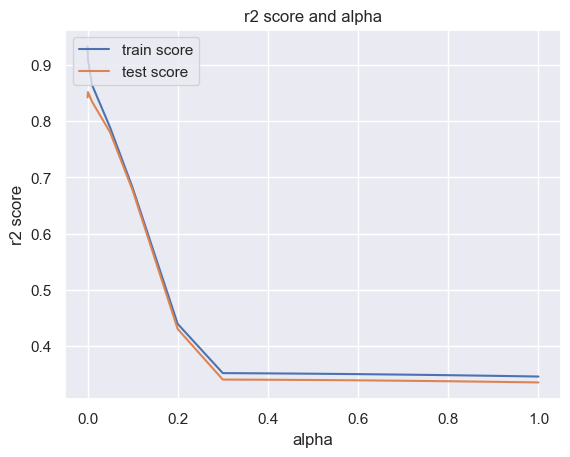

In [3570]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### As alpha increases there is a drop in r2 score. So as a trade off between bias and variance we have to select a small value for alpha. Hence we can select 0.01

In [3571]:
alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.02088158,  0.        ,  0.0161764 ,  0.12169456,  0.05501925,
        0.        ,  0.0042304 ,  0.        ,  0.01405152,  0.0067451 ,
        0.        , -0.        ,  0.12809608,  0.0282747 ,  0.        ,
        0.01262645,  0.        ,  0.        , -0.0032766 ,  0.02728801,
        0.04039086,  0.00714559,  0.        ,  0.        ,  0.        ,
        0.00868354, -0.01922505, -0.0037849 ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.  

#### As we can see Lasso makes insignificant variable coefficients as zero

In [3572]:
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.158),
 ('MSSubClass', -0.021),
 ('LotFrontage', 0.0),
 ('LotArea', 0.016),
 ('OverallQual', 0.122),
 ('OverallCond', 0.055),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.004),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.014),
 ('1stFlrSF', 0.007),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.128),
 ('BsmtFullBath', 0.028),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.013),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.003),
 ('Fireplaces', 0.027),
 ('GarageArea', 0.04),
 ('WoodDeckSF', 0.007),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.009),
 ('PoolArea', -0.019),
 ('houseage', -0.004),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', -0.0),
 ('LotConfig_FR3'

In [3573]:
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8601449108340863
0.8504537509321285


#### R2 values of train and test are comparable and we can conclude that it is a robust model

In [3574]:
mod_param = list(zip(cols, model_parameters))

In [3575]:
param = pd.DataFrame(mod_param)
param.columns = ['Variable', 'Coeff']
param.head()

Variable   Coeff
0     constant  12.158
1   MSSubClass  -0.021
2  LotFrontage   0.000
3      LotArea   0.016
4  OverallQual   0.122

In [3576]:
param1 = param.sort_values((['Coeff']), axis = 0, ascending = False)
param1

Variable   Coeff
0                      constant  12.158
13                    GrLivArea   0.128
4                   OverallQual   0.122
5                   OverallCond   0.055
21                   GarageArea   0.040
14                 BsmtFullBath   0.028
20                   Fireplaces   0.027
3                       LotArea   0.016
9                   TotalBsmtSF   0.014
16                     FullBath   0.013
26                  ScreenPorch   0.009
10                     1stFlrSF   0.007
22                   WoodDeckSF   0.007
7                    BsmtFinSF1   0.004
143      BsmtCond_Not Available  -0.000
149  BsmtExposure_Not Available  -0.000
142                 BsmtCond_Gd   0.000
145                 BsmtCond_TA   0.000
146             BsmtExposure_Gd   0.000
147             BsmtExposure_Mn   0.000
148             BsmtExposure_No  -0.000
141                 BsmtQual_TA  -0.000
140      BsmtQual_Not Available  -0.000
144                 BsmtCond_Po   0.000
153  BsmtFinType1_Not Available  -0.000
150            BsmtFinType1_BLQ   0.000
151            BsmtFinType1_GLQ   0.000
152            BsmtFinType1_LwQ  -0.000
138                 BsmtQual_Fa   0.000
154            BsmtFinType1_Rec   0.000
155            BsmtFinType1_Unf  -0.000
156            BsmtFinType2_BLQ  -0.000
157            BsmtFinType2_GLQ   0.000
158            BsmtFinType2_LwQ   0.000
159  BsmtFinType2_Not Available  -0.000
160            BsmtFinType2_Rec  -0.000
139                 BsmtQual_Gd   0.000
131                ExterCond_Po  -0.000
137             Foundation_Wood   0.000
136            Foundation_Stone   0.000
115           Exterior2nd_Other   0.000
116         Exterior2nd_Plywood  -0.000
117           Exterior2nd_Stone   0.000
118          Exterior2nd_Stucco  -0.000
119         Exterior2nd_VinylSd   0.000
120         Exterior2nd_Wd Sdng   0.000
121         Exterior2nd_Wd Shng  -0.000
122          MasVnrType_BrkFace  -0.000
123             MasVnrType_None   0.000
124    MasVnrType_Not Available  -0.000
125            MasVnrType_Stone   0.000
126                ExterQual_Fa  -0.000
127                ExterQual_Gd   0.000
128                ExterQual_TA  -0.000
129                ExterCond_Fa  -0.000
130                ExterCond_Gd  -0.000
162                HeatingQC_Fa  -0.000
132                ExterCond_TA   0.000
133           Foundation_CBlock  -0.000
134            Foundation_PConc   0.000
135             Foundation_Slab  -0.000
161            BsmtFinType2_Unf   0.000
169              Electrical_Mix   0.000
163                HeatingQC_Gd  -0.000
188               GarageQual_Fa   0.000
190    GarageQual_Not Available  -0.000
191               GarageQual_Po   0.000
192               GarageQual_TA   0.000
193                PavedDrive_P  -0.000
194                PavedDrive_Y   0.000
195   MiscFeature_Not Available   0.000
196            MiscFeature_Othr  -0.000
197            MiscFeature_Shed  -0.000
198            MiscFeature_TenC   0.000
199                SaleType_CWD   0.000
200                SaleType_Con   0.000
201              SaleType_ConLD  -0.000
202              SaleType_ConLI  -0.000
203              SaleType_ConLw  -0.000
204                SaleType_New   0.000
205                SaleType_Oth   0.000
206                 SaleType_WD  -0.000
207       SaleCondition_AdjLand  -0.000
208        SaleCondition_Alloca   0.000
209        SaleCondition_Family  -0.000
210        SaleCondition_Normal   0.000
189               GarageQual_Gd   0.000
187            GarageFinish_Unf  -0.000
164                HeatingQC_Po  -0.000
186            GarageFinish_RFn   0.000
165                HeatingQC_TA  -0.000
166                CentralAir_Y   0.000
167            Electrical_FuseF  -0.000
168            Electrical_FuseP  -0.000
113         Exterior2nd_ImStucc   0.000
170            Electrical_SBrkr   0.000
171              KitchenQual_Fa  -0.000
172              KitchenQual_Gd   0.000
173              KitchenQual_TA  -0.000
174              Firepl

In [3577]:
# variables with non zero coefficients
ind_var = pd.DataFrame(param1[(param1['Coeff'] != 0)])
ind_var

Variable   Coeff
0       constant  12.158
13     GrLivArea   0.128
4    OverallQual   0.122
5    OverallCond   0.055
21    GarageArea   0.040
14  BsmtFullBath   0.028
20    Fireplaces   0.027
3        LotArea   0.016
9    TotalBsmtSF   0.014
16      FullBath   0.013
26   ScreenPorch   0.009
10      1stFlrSF   0.007
22    WoodDeckSF   0.007
7     BsmtFinSF1   0.004
19  KitchenAbvGr  -0.003
28      houseage  -0.004
27      PoolArea  -0.019
1     MSSubClass  -0.021

#### Above listed are the important variables with coefficient values

#### To Anser subjective question 1, we doubled the alpha 

In [3578]:
lm = Lasso(alpha=0.02)
lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.843974132365943
0.8439433434433057


In [3579]:
param = pd.DataFrame(mod_param)
param.columns = ['Variable', 'Coeff']
param.head()

Variable   Coeff
0     constant  12.158
1   MSSubClass  -0.021
2  LotFrontage   0.000
3      LotArea   0.016
4  OverallQual   0.122

In [3580]:
param2 = param.sort_values((['Coeff']), axis = 0, ascending = False)
param2

Variable   Coeff
0                      constant  12.158
13                    GrLivArea   0.128
4                   OverallQual   0.122
5                   OverallCond   0.055
21                   GarageArea   0.040
14                 BsmtFullBath   0.028
20                   Fireplaces   0.027
3                       LotArea   0.016
9                   TotalBsmtSF   0.014
16                     FullBath   0.013
26                  ScreenPorch   0.009
10                     1stFlrSF   0.007
22                   WoodDeckSF   0.007
7                    BsmtFinSF1   0.004
143      BsmtCond_Not Available  -0.000
149  BsmtExposure_Not Available  -0.000
142                 BsmtCond_Gd   0.000
145                 BsmtCond_TA   0.000
146             BsmtExposure_Gd   0.000
147             BsmtExposure_Mn   0.000
148             BsmtExposure_No  -0.000
141                 BsmtQual_TA  -0.000
140      BsmtQual_Not Available  -0.000
144                 BsmtCond_Po   0.000
153  BsmtFinType1_Not Available  -0.000
150            BsmtFinType1_BLQ   0.000
151            BsmtFinType1_GLQ   0.000
152            BsmtFinType1_LwQ  -0.000
138                 BsmtQual_Fa   0.000
154            BsmtFinType1_Rec   0.000
155            BsmtFinType1_Unf  -0.000
156            BsmtFinType2_BLQ  -0.000
157            BsmtFinType2_GLQ   0.000
158            BsmtFinType2_LwQ   0.000
159  BsmtFinType2_Not Available  -0.000
160            BsmtFinType2_Rec  -0.000
139                 BsmtQual_Gd   0.000
131                ExterCond_Po  -0.000
137             Foundation_Wood   0.000
136            Foundation_Stone   0.000
115           Exterior2nd_Other   0.000
116         Exterior2nd_Plywood  -0.000
117           Exterior2nd_Stone   0.000
118          Exterior2nd_Stucco  -0.000
119         Exterior2nd_VinylSd   0.000
120         Exterior2nd_Wd Sdng   0.000
121         Exterior2nd_Wd Shng  -0.000
122          MasVnrType_BrkFace  -0.000
123             MasVnrType_None   0.000
124    MasVnrType_Not Available  -0.000
125            MasVnrType_Stone   0.000
126                ExterQual_Fa  -0.000
127                ExterQual_Gd   0.000
128                ExterQual_TA  -0.000
129                ExterCond_Fa  -0.000
130                ExterCond_Gd  -0.000
162                HeatingQC_Fa  -0.000
132                ExterCond_TA   0.000
133           Foundation_CBlock  -0.000
134            Foundation_PConc   0.000
135             Foundation_Slab  -0.000
161            BsmtFinType2_Unf   0.000
169              Electrical_Mix   0.000
163                HeatingQC_Gd  -0.000
188               GarageQual_Fa   0.000
190    GarageQual_Not Available  -0.000
191               GarageQual_Po   0.000
192               GarageQual_TA   0.000
193                PavedDrive_P  -0.000
194                PavedDrive_Y   0.000
195   MiscFeature_Not Available   0.000
196            MiscFeature_Othr  -0.000
197            MiscFeature_Shed  -0.000
198            MiscFeature_TenC   0.000
199                SaleType_CWD   0.000
200                SaleType_Con   0.000
201              SaleType_ConLD  -0.000
202              SaleType_ConLI  -0.000
203              SaleType_ConLw  -0.000
204                SaleType_New   0.000
205                SaleType_Oth   0.000
206                 SaleType_WD  -0.000
207       SaleCondition_AdjLand  -0.000
208        SaleCondition_Alloca   0.000
209        SaleCondition_Family  -0.000
210        SaleCondition_Normal   0.000
189               GarageQual_Gd   0.000
187            GarageFinish_Unf  -0.000
164                HeatingQC_Po  -0.000
186            GarageFinish_RFn   0.000
165                HeatingQC_TA  -0.000
166                CentralAir_Y   0.000
167            Electrical_FuseF  -0.000
168            Electrical_FuseP  -0.000
113         Exterior2nd_ImStucc   0.000
170            Electrical_SBrkr   0.000
171              KitchenQual_Fa  -0.000
172              KitchenQual_Gd   0.000
173              KitchenQual_TA  -0.000
174              Firepl

In [3581]:
ind_var = pd.DataFrame(param2[(param2['Coeff'] != 0)])
ind_var

Variable   Coeff
0       constant  12.158
13     GrLivArea   0.128
4    OverallQual   0.122
5    OverallCond   0.055
21    GarageArea   0.040
14  BsmtFullBath   0.028
20    Fireplaces   0.027
3        LotArea   0.016
9    TotalBsmtSF   0.014
16      FullBath   0.013
26   ScreenPorch   0.009
10      1stFlrSF   0.007
22    WoodDeckSF   0.007
7     BsmtFinSF1   0.004
19  KitchenAbvGr  -0.003
28      houseage  -0.004
27      PoolArea  -0.019
1     MSSubClass  -0.021

### Creating another model by excluding top 5 variables to answer 3rd Question in Subjective questions

In [3582]:
X_train_new = X_train.drop(['GrLivArea','OverallQual','OverallCond','GarageArea','BsmtFullBath'],axis = 1)
X_test_new = X_test.drop(['GrLivArea','OverallQual','OverallCond','GarageArea','BsmtFullBath'],axis = 1)

In [3583]:
X_train.shape

(1021, 212)

In [3584]:
X_train_new.shape

(1021, 207)

In [3585]:
alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_new, y_train)
lasso.coef_

array([-0.01482001,  0.00343956,  0.01166581,  0.00257442,  0.01692144,
        0.        ,  0.04040476,  0.12790888,  0.1277789 ,  0.        ,
        0.        ,  0.02799707,  0.00303078,  0.        , -0.02886482,
        0.03199081,  0.01598596,  0.00787303,  0.00513763,  0.        ,
        0.0149807 , -0.02203358, -0.00417213,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.  

In [3586]:
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.192),
 ('MSSubClass', -0.015),
 ('LotFrontage', 0.003),
 ('LotArea', 0.012),
 ('OverallQual', 0.003),
 ('OverallCond', 0.017),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.04),
 ('BsmtFinSF2', 0.128),
 ('TotalBsmtSF', 0.128),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.028),
 ('GrLivArea', 0.003),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', -0.029),
 ('FullBath', 0.032),
 ('HalfBath', 0.016),
 ('BedroomAbvGr', 0.008),
 ('KitchenAbvGr', 0.005),
 ('Fireplaces', 0.0),
 ('GarageArea', 0.015),
 ('WoodDeckSF', -0.022),
 ('OpenPorchSF', -0.004),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', -0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', -0.0),
 ('houseage', 0.0),
 ('MSZoning_FV', -0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', -0.0),
 ('LotShape_IR3', 0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', -0.0),
 ('LandContour_Lvl', 0.0),
 ('LotConfig_CulDSac', -0.0),
 ('LotConfig_FR2', -0.0),
 ('LotConfi

In [3587]:
lm = Lasso(alpha=0.01)
lm.fit(X_train_new, y_train)

y_train_pred = lm.predict(X_train_new)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test_new)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.7954042281464873
0.7800410422268097


In [3588]:
mod_param = list(zip(cols, model_parameters))

In [3589]:
param = pd.DataFrame(mod_param)
param.columns = ['Variable', 'Coeff']
param.head()

Variable   Coeff
0     constant  12.192
1   MSSubClass  -0.015
2  LotFrontage   0.003
3      LotArea   0.012
4  OverallQual   0.003

In [3590]:
param2 = param.sort_values((['Coeff']), axis = 0, ascending = False)
param2

Variable   Coeff
0                      constant  12.192
8                    BsmtFinSF2   0.128
9                   TotalBsmtSF   0.128
7                    BsmtFinSF1   0.040
16                     FullBath   0.032
170            Electrical_SBrkr   0.028
12                 LowQualFinSF   0.028
146             BsmtExposure_Gd   0.025
5                   OverallCond   0.017
17                     HalfBath   0.016
21                   GarageArea   0.015
3                       LotArea   0.012
18                 BedroomAbvGr   0.008
19                 KitchenAbvGr   0.005
2                   LotFrontage   0.003
13                    GrLivArea   0.003
4                   OverallQual   0.003
153  BsmtFinType1_Not Available   0.000
137             Foundation_Wood   0.000
138                 BsmtQual_Fa  -0.000
139                 BsmtQual_Gd  -0.000
140      BsmtQual_Not Available   0.000
141                 BsmtQual_TA   0.000
142                 BsmtCond_Gd   0.000
143      BsmtCond_Not Available  -0.000
144                 BsmtCond_Po  -0.000
145                 BsmtCond_TA  -0.000
147             BsmtExposure_Mn  -0.000
152            BsmtFinType1_LwQ   0.000
148             BsmtExposure_No  -0.000
149  BsmtExposure_Not Available   0.000
150            BsmtFinType1_BLQ  -0.000
156            BsmtFinType2_BLQ   0.000
151            BsmtFinType1_GLQ  -0.000
135             Foundation_Slab  -0.000
155            BsmtFinType1_Unf  -0.000
154            BsmtFinType1_Rec  -0.000
136            Foundation_Stone  -0.000
128                ExterQual_TA  -0.000
134            Foundation_PConc  -0.000
121         Exterior2nd_Wd Shng  -0.000
112         Exterior2nd_HdBoard   0.000
113         Exterior2nd_ImStucc  -0.000
114         Exterior2nd_MetalSd   0.000
115           Exterior2nd_Other   0.000
116         Exterior2nd_Plywood  -0.000
117           Exterior2nd_Stone  -0.000
118          Exterior2nd_Stucco  -0.000
119         Exterior2nd_VinylSd  -0.000
120         Exterior2nd_Wd Sdng   0.000
122          MasVnrType_BrkFace   0.000
133           Foundation_CBlock  -0.000
124    MasVnrType_Not Available  -0.000
125            MasVnrType_Stone   0.000
126                ExterQual_Fa  -0.000
127                ExterQual_Gd   0.000
158            BsmtFinType2_LwQ  -0.000
129                ExterCond_Fa   0.000
130                ExterCond_Gd  -0.000
131                ExterCond_Po   0.000
132                ExterCond_TA   0.000
157            BsmtFinType2_GLQ  -0.000
167            Electrical_FuseF   0.000
159  BsmtFinType2_Not Available  -0.000
196            MiscFeature_Othr  -0.000
187            GarageFinish_Unf   0.000
188               GarageQual_Fa  -0.000
189               GarageQual_Gd   0.000
190    GarageQual_Not Available   0.000
191               GarageQual_Po  -0.000
192               GarageQual_TA  -0.000
193                PavedDrive_P   0.000
194                PavedDrive_Y   0.000
195   MiscFeature_Not Available   0.000
197            MiscFeature_Shed  -0.000
161            BsmtFinType2_Unf   0.000
198            MiscFeature_TenC  -0.000
199                SaleType_CWD   0.000
200                SaleType_Con  -0.000
201              SaleType_ConLD  -0.000
202              SaleType_ConLI  -0.000
203              SaleType_ConLw   0.000
204                SaleType_New  -0.000
205                SaleType_Oth   0.000
206                 SaleType_WD   0.000
186            GarageFinish_RFn   0.000
185  GarageFinish_Not Available  -0.000
184    GarageType_Not Available   0.000
183           GarageType_Detchd  -0.000
162                HeatingQC_Fa  -0.000
163                HeatingQC_Gd  -0.000
164                HeatingQC_Po   0.000
165                HeatingQC_TA   0.000
166                CentralAir_Y  -0.000
110          Exterior2nd_CBlock   0.000
169              Electrical_Mix   0.000
171              KitchenQual_Fa  -0.000
172              KitchenQual_Gd  -0.000
173              KitchenQual_TA  -0.000
174              Firepl

In [3591]:
ind_var = pd.DataFrame(param2[(param2['Coeff'] != 0)])
ind_var

Variable   Coeff
0            constant  12.192
8          BsmtFinSF2   0.128
9         TotalBsmtSF   0.128
7          BsmtFinSF1   0.040
16           FullBath   0.032
170  Electrical_SBrkr   0.028
12       LowQualFinSF   0.028
146   BsmtExposure_Gd   0.025
5         OverallCond   0.017
17           HalfBath   0.016
21         GarageArea   0.015
3             LotArea   0.012
18       BedroomAbvGr   0.008
19       KitchenAbvGr   0.005
2         LotFrontage   0.003
13          GrLivArea   0.003
4         OverallQual   0.003
160  BsmtFinType2_Rec  -0.002
23        OpenPorchSF  -0.004
123   MasVnrType_None  -0.011
1          MSSubClass  -0.015
22         WoodDeckSF  -0.022
15       BsmtHalfBath  -0.029
168  Electrical_FuseP  -0.052

### Ridge Regression

In [3592]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [3593]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.012889      0.004257         0.004487        0.000520      0.0001   
1        0.010851      0.002425         0.003647        0.001873       0.001   
2        0.007006      0.005227         0.005469        0.005362        0.01   
3        0.013249      0.001879         0.003785        0.000705        0.05   
4        0.013323      0.003437         0.003900        0.000877         0.1   
5        0.009229      0.004919         0.003668        0.001873         0.2   
6        0.010684      0.000769         0.004450        0.000438         0.3   
7        0.011607      0.000417         0.004707        0.000426         0.4   
8        0.012252      0.003058         0.003530        0.001483         0.5   
9        0.010697      0.000548         0.003631        0.001979         0.6   
10       0.007167      0.006472         0.004846        0.005734         0.7   
11       0.006258      0.007664         0.007587        0.007046         0.8   
12       0.008258      0.007106         0.005669        0.005286         0.9   
13       0.011398      0.006101         0.003130        0.006259         1.0   
14       0.012519      0.006259         0.003228        0.006456         2.0   
15       0.011320      0.006136         0.003126        0.006251         3.0   
16       0.009021      0.004664         0.006108        0.005135         4.0   
17       0.010441      0.005740         0.005401        0.005804         5.0   
18       0.015646      0.000068         0.002414        0.004827         6.0   
19       0.009080      0.007438         0.003544        0.007088         7.0   
20       0.007780      0.007019         0.003118        0.006236         8.0   
21       0.009460      0.007778         0.003111        0.006222         9.0   
22       0.012476      0.007008         0.003125        0.006251        10.0   
23       0.006241      0.007644         0.004738        0.006259          20   
24       0.006301      0.007717         0.009058        0.007418          50   
25       0.010836      0.006056         0.002327        0.002892         100   
26       0.010341      0.001086         0.004627        0.000456         500   
27       0.009911      0.004762         0.006081        0.005549        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}           0.814647           0.892517   
1    {'alpha': 0.001}           0.814787           0.892582   
2     {'alpha': 0.01}           0.816134           0.893203   
3     {'alpha': 0.05}           0.821205           0.895494   
4      {'alpha': 0.1}           0.826058           0.897593   
5      {'alpha': 0.2}           0.832880           0.900356   
6      {'alpha': 0.3}           0.837544           0.902141   
7      {'alpha': 0.4}           0.840997           0.903432   
8      {'alpha': 0.5}           0.843695           0.904437   
9      {'alpha': 0.6}           0.845886           0.905257   
10     {'alpha': 0.7}           0.847719           0.905949   
11     {'alpha': 0.8}           0.849288           0.906547   
12     {'alpha': 0.9}           0.850654           0.907073   
13     {'alpha': 1.0}           0.851863           0.907542   
14     {'alpha': 2.0}           0.859476           0.910536   
15     {'alpha': 3.0}           0.863668           0.912137   
16     {'alpha': 4.0}           0.866505           0.913150   
17     {'alpha': 5.0}           0.868605           0.913839   
18     {'alpha': 6.0}           0.870240           0.914329   
19     {'alpha': 7.0}           0.871557           0.914685   
20     {'alpha': 8.0}           0.872643           0.914948   
21     {'alpha': 9.0}           0.873554           0.915142   
22    {'alpha': 10.0}           0.874330           0.915285   
23      {'alpha': 20}           0.878386           0.915462   
24      {'alpha': 50}           0.880821           0.913575   
25     {'alpha': 100}           0.880687     

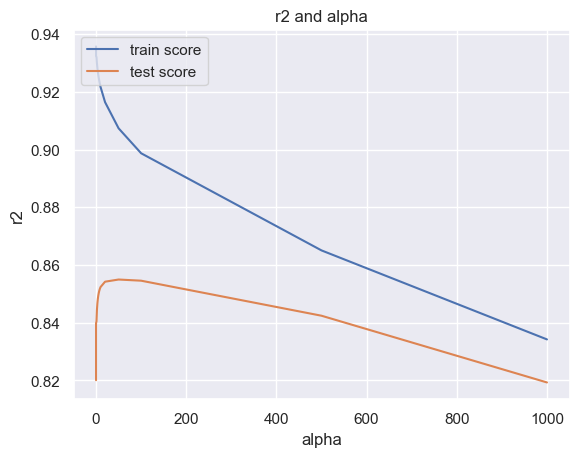

In [3594]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### R2 variation is not significant after alpha 10 hence we can select alpha as 10

In [3595]:
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.36018019e-02,  7.50239371e-03,  1.56737824e-02,  6.28677116e-02,
        4.25191330e-02,  1.06100454e-02,  1.35875706e-02,  4.84297548e-03,
        2.37168892e-02,  3.42773083e-02,  2.83171644e-02,  2.09813219e-03,
        4.88982852e-02,  1.68884990e-02,  1.87211449e-04,  2.83207190e-02,
        1.46142066e-02,  1.36120782e-02, -9.41884422e-03,  2.31326520e-02,
        3.56154829e-02,  1.37458107e-02,  1.00904493e-02,  8.96616045e-03,
        3.19956488e-03,  1.35884670e-02, -1.65799006e-02, -3.13766917e-03,
        2.08934126e-03,  7.06647913e-04,  1.19875510e-02, -1.12240508e-02,
        2.52770272e-03, -3.14866943e-03, -8.57113029e-03,  3.41890086e-03,
        7.77745462e-04, -3.38099780e-03,  5.82719767e-03, -1.67291621e-03,
       -8.73308666e-07, -4.56070422e-03,  3.11681535e-03, -5.51216814e-04,
       -1.86352178e-04, -2.75542852e-03,  2.39942316e-03,  1.55839631e-03,
       -3.65751670e-03,  1.11492302e-02, -1.07603109e-02, -3.08316161e-03,
       -5.07058762e-03, -

In [3596]:

model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.123),
 ('MSSubClass', -0.014),
 ('LotFrontage', 0.008),
 ('LotArea', 0.016),
 ('OverallQual', 0.063),
 ('OverallCond', 0.043),
 ('MasVnrArea', 0.011),
 ('BsmtFinSF1', 0.014),
 ('BsmtFinSF2', 0.005),
 ('TotalBsmtSF', 0.024),
 ('1stFlrSF', 0.034),
 ('2ndFlrSF', 0.028),
 ('LowQualFinSF', 0.002),
 ('GrLivArea', 0.049),
 ('BsmtFullBath', 0.017),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.028),
 ('HalfBath', 0.015),
 ('BedroomAbvGr', 0.014),
 ('KitchenAbvGr', -0.009),
 ('Fireplaces', 0.023),
 ('GarageArea', 0.036),
 ('WoodDeckSF', 0.014),
 ('OpenPorchSF', 0.01),
 ('EnclosedPorch', 0.009),
 ('3SsnPorch', 0.003),
 ('ScreenPorch', 0.014),
 ('PoolArea', -0.017),
 ('houseage', -0.003),
 ('MSZoning_FV', 0.002),
 ('MSZoning_RH', 0.001),
 ('MSZoning_RL', 0.012),
 ('MSZoning_RM', -0.011),
 ('LotShape_IR2', 0.003),
 ('LotShape_IR3', -0.003),
 ('LotShape_Reg', -0.009),
 ('LandContour_HLS', 0.003),
 ('LandContour_Low', 0.001),
 ('LandContour_Lvl', -0.003),
 ('LotConfig_CulDSac', 0.006),
 (

In [3597]:
# ridge regression
lm = Ridge(alpha=500)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8674833281387955
0.8533665541442437


#### Ridge regression has also given a robust model as train and test set had provided almost same R2 Score

In [3598]:
mod_param = list(zip(cols, model_parameters))

In [3599]:
param = pd.DataFrame(mod_param)
param.columns = ['Variable', 'Coeff']
param.head()

Variable   Coeff
0     constant  12.123
1   MSSubClass  -0.014
2  LotFrontage   0.008
3      LotArea   0.016
4  OverallQual   0.063

In [3600]:
param = param.sort_values((['Coeff']), axis = 0, ascending = False)
param

Variable   Coeff
0                      constant  12.123
4                   OverallQual   0.063
13                    GrLivArea   0.049
5                   OverallCond   0.043
21                   GarageArea   0.036
10                     1stFlrSF   0.034
16                     FullBath   0.028
11                     2ndFlrSF   0.028
9                   TotalBsmtSF   0.024
20                   Fireplaces   0.023
14                 BsmtFullBath   0.017
3                       LotArea   0.016
175              FireplaceQu_Gd   0.015
17                     HalfBath   0.015
26                  ScreenPorch   0.014
22                   WoodDeckSF   0.014
18                 BedroomAbvGr   0.014
7                    BsmtFinSF1   0.014
134            Foundation_PConc   0.012
151            BsmtFinType1_GLQ   0.012
31                  MSZoning_RL   0.012
6                    MasVnrArea   0.011
50         Neighborhood_Crawfor   0.011
23                  OpenPorchSF   0.010
70              Condition1_Norm   0.010
24                EnclosedPorch   0.009
127                ExterQual_Gd   0.009
60         Neighborhood_NridgHt   0.009
166                CentralAir_Y   0.009
2                   LotFrontage   0.008
90                RoofStyle_Hip   0.008
146             BsmtExposure_Gd   0.007
125            MasVnrType_Stone   0.007
204                SaleType_New   0.007
39            LotConfig_CulDSac   0.006
132                ExterCond_TA   0.006
66         Neighborhood_StoneBr   0.006
211       SaleCondition_Partial   0.006
179           GarageType_Attchd   0.005
210        SaleCondition_Normal   0.005
145                 BsmtCond_TA   0.005
181          GarageType_BuiltIn   0.005
161            BsmtFinType2_Unf   0.005
8                    BsmtFinSF2   0.005
192               GarageQual_TA   0.005
95          Exterior1st_BrkFace   0.005
194                PavedDrive_Y   0.004
59         Neighborhood_NoRidge   0.004
104         Exterior1st_VinylSd   0.004
119         Exterior2nd_VinylSd   0.004
120         Exterior2nd_Wd Sdng   0.003
33                 LotShape_IR2   0.003
36              LandContour_HLS   0.003
170            Electrical_SBrkr   0.003
172              KitchenQual_Gd   0.003
25                    3SsnPorch   0.003
43                LandSlope_Mod   0.003
142                 BsmtCond_Gd   0.003
65         Neighborhood_Somerst   0.003
97          Exterior1st_CemntBd   0.002
100         Exterior1st_MetalSd   0.002
12                 LowQualFinSF   0.002
67          Neighborhood_Timber   0.002
85            HouseStyle_2Story   0.002
195   MiscFeature_Not Available   0.002
147             BsmtExposure_Mn   0.002
29                  MSZoning_FV   0.002
47         Neighborhood_BrkSide   0.002
111         Exterior2nd_CmentBd   0.002
48         Neighborhood_ClearCr   0.002
62           Neighborhood_SWISU   0.002
136            Foundation_Stone   0.001
37              LandContour_Low   0.001
91            RoofStyle_Mansard   0.001
109         Exterior2nd_BrkFace   0.001
117           Exterior2nd_Stone   0.001
114         Exterior2nd_MetalSd   0.001
113         Exterior2nd_ImStucc   0.001
105         Exterior1st_Wd Sdng   0.001
158            BsmtFinType2_LwQ   0.001
84            HouseStyle_2.5Unf   0.001
157            BsmtFinType2_GLQ   0.001
154            BsmtFinType1_Rec   0.001
30                  MSZoning_RH   0.001
68         Neighborhood_Veenker   0.001
74              Condition1_RRAn   0.001
189               GarageQual_Gd   0.001
77              BldgType_2fmCon   0.001
208        SaleCondition_Alloca   0.001
199                SaleType_CWD   0.001
200                SaleType_Con   0.001
193                PavedDrive_P  -0.000
110          Exterior2nd_CBlock  -0.000
57         Neighborhood_NPkVill  -0.000
198            MiscFeature_TenC   0.000
115           Exterior2nd_Other   0.000
83            HouseStyle_2.5Fin   0.000
201              SaleType_ConLD  -0.000
81            HouseStyle_1.5Unf  -0.000
205                Sale

In [3601]:
ind_var = pd.DataFrame(param[(param['Coeff'] != 0)])
ind_var

Variable   Coeff
0                      constant  12.123
4                   OverallQual   0.063
13                    GrLivArea   0.049
5                   OverallCond   0.043
21                   GarageArea   0.036
10                     1stFlrSF   0.034
16                     FullBath   0.028
11                     2ndFlrSF   0.028
9                   TotalBsmtSF   0.024
20                   Fireplaces   0.023
14                 BsmtFullBath   0.017
3                       LotArea   0.016
175              FireplaceQu_Gd   0.015
17                     HalfBath   0.015
26                  ScreenPorch   0.014
22                   WoodDeckSF   0.014
18                 BedroomAbvGr   0.014
7                    BsmtFinSF1   0.014
134            Foundation_PConc   0.012
151            BsmtFinType1_GLQ   0.012
31                  MSZoning_RL   0.012
6                    MasVnrArea   0.011
50         Neighborhood_Crawfor   0.011
23                  OpenPorchSF   0.010
70              Condition1_Norm   0.010
24                EnclosedPorch   0.009
127                ExterQual_Gd   0.009
60         Neighborhood_NridgHt   0.009
166                CentralAir_Y   0.009
2                   LotFrontage   0.008
90                RoofStyle_Hip   0.008
146             BsmtExposure_Gd   0.007
125            MasVnrType_Stone   0.007
204                SaleType_New   0.007
39            LotConfig_CulDSac   0.006
132                ExterCond_TA   0.006
66         Neighborhood_StoneBr   0.006
211       SaleCondition_Partial   0.006
179           GarageType_Attchd   0.005
210        SaleCondition_Normal   0.005
145                 BsmtCond_TA   0.005
181          GarageType_BuiltIn   0.005
161            BsmtFinType2_Unf   0.005
8                    BsmtFinSF2   0.005
192               GarageQual_TA   0.005
95          Exterior1st_BrkFace   0.005
194                PavedDrive_Y   0.004
59         Neighborhood_NoRidge   0.004
104         Exterior1st_VinylSd   0.004
119         Exterior2nd_VinylSd   0.004
120         Exterior2nd_Wd Sdng   0.003
33                 LotShape_IR2   0.003
36              LandContour_HLS   0.003
170            Electrical_SBrkr   0.003
172              KitchenQual_Gd   0.003
25                    3SsnPorch   0.003
43                LandSlope_Mod   0.003
142                 BsmtCond_Gd   0.003
65         Neighborhood_Somerst   0.003
97          Exterior1st_CemntBd   0.002
100         Exterior1st_MetalSd   0.002
12                 LowQualFinSF   0.002
67          Neighborhood_Timber   0.002
85            HouseStyle_2Story   0.002
195   MiscFeature_Not Available   0.002
147             BsmtExposure_Mn   0.002
29                  MSZoning_FV   0.002
47         Neighborhood_BrkSide   0.002
111         Exterior2nd_CmentBd   0.002
48         Neighborhood_ClearCr   0.002
62           Neighborhood_SWISU   0.002
136            Foundation_Stone   0.001
37              LandContour_Low   0.001
91            RoofStyle_Mansard   0.001
109         Exterior2nd_BrkFace   0.001
117           Exterior2nd_Stone   0.001
114         Exterior2nd_MetalSd   0.001
113         Exterior2nd_ImStucc   0.001
105         Exterior1st_Wd Sdng   0.001
158            BsmtFinType2_LwQ   0.001
84            HouseStyle_2.5Unf   0.001
157            BsmtFinType2_GLQ   0.001
154            BsmtFinType1_Rec   0.001
30                  MSZoning_RH   0.001
68         Neighborhood_Veenker   0.001
74              Condition1_RRAn   0.001
189               GarageQual_Gd   0.001
77              BldgType_2fmCon   0.001
208        SaleCondition_Alloca   0.001
199                SaleType_CWD   0.001
200                SaleType_Con   0.001
152            BsmtFinType1_LwQ  -0.001
150            BsmtFinType1_BLQ  -0.001
203              SaleType_ConLw  -0.001
156            BsmtFinType2_BLQ  -0.001
183           GarageType_Detchd  -0.001
196            MiscFeature_Othr  -0.001
202              SaleType_ConLI  -0.001
106         Exterior1st_WdShing  -0.001
94          Exterior1st

### Creating a new model to answer 1st subjective question. Doubling the alpha value for ridge model

In [3602]:
lm = Ridge(alpha=1000)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8424757304991601
0.8324076301725241


In [3603]:
mod_param = list(zip(cols, model_parameters))

In [3604]:
param3 = pd.DataFrame(mod_param)
param3.columns = ['Variable', 'Coeff']
param3.head()

Variable   Coeff
0     constant  12.123
1   MSSubClass  -0.014
2  LotFrontage   0.008
3      LotArea   0.016
4  OverallQual   0.063

In [3605]:
param3 = param3.sort_values((['Coeff']), axis = 0, ascending = False)
param3

Variable   Coeff
0                      constant  12.123
4                   OverallQual   0.063
13                    GrLivArea   0.049
5                   OverallCond   0.043
21                   GarageArea   0.036
10                     1stFlrSF   0.034
16                     FullBath   0.028
11                     2ndFlrSF   0.028
9                   TotalBsmtSF   0.024
20                   Fireplaces   0.023
14                 BsmtFullBath   0.017
3                       LotArea   0.016
175              FireplaceQu_Gd   0.015
17                     HalfBath   0.015
26                  ScreenPorch   0.014
22                   WoodDeckSF   0.014
18                 BedroomAbvGr   0.014
7                    BsmtFinSF1   0.014
134            Foundation_PConc   0.012
151            BsmtFinType1_GLQ   0.012
31                  MSZoning_RL   0.012
6                    MasVnrArea   0.011
50         Neighborhood_Crawfor   0.011
23                  OpenPorchSF   0.010
70              Condition1_Norm   0.010
24                EnclosedPorch   0.009
127                ExterQual_Gd   0.009
60         Neighborhood_NridgHt   0.009
166                CentralAir_Y   0.009
2                   LotFrontage   0.008
90                RoofStyle_Hip   0.008
146             BsmtExposure_Gd   0.007
125            MasVnrType_Stone   0.007
204                SaleType_New   0.007
39            LotConfig_CulDSac   0.006
132                ExterCond_TA   0.006
66         Neighborhood_StoneBr   0.006
211       SaleCondition_Partial   0.006
179           GarageType_Attchd   0.005
210        SaleCondition_Normal   0.005
145                 BsmtCond_TA   0.005
181          GarageType_BuiltIn   0.005
161            BsmtFinType2_Unf   0.005
8                    BsmtFinSF2   0.005
192               GarageQual_TA   0.005
95          Exterior1st_BrkFace   0.005
194                PavedDrive_Y   0.004
59         Neighborhood_NoRidge   0.004
104         Exterior1st_VinylSd   0.004
119         Exterior2nd_VinylSd   0.004
120         Exterior2nd_Wd Sdng   0.003
33                 LotShape_IR2   0.003
36              LandContour_HLS   0.003
170            Electrical_SBrkr   0.003
172              KitchenQual_Gd   0.003
25                    3SsnPorch   0.003
43                LandSlope_Mod   0.003
142                 BsmtCond_Gd   0.003
65         Neighborhood_Somerst   0.003
97          Exterior1st_CemntBd   0.002
100         Exterior1st_MetalSd   0.002
12                 LowQualFinSF   0.002
67          Neighborhood_Timber   0.002
85            HouseStyle_2Story   0.002
195   MiscFeature_Not Available   0.002
147             BsmtExposure_Mn   0.002
29                  MSZoning_FV   0.002
47         Neighborhood_BrkSide   0.002
111         Exterior2nd_CmentBd   0.002
48         Neighborhood_ClearCr   0.002
62           Neighborhood_SWISU   0.002
136            Foundation_Stone   0.001
37              LandContour_Low   0.001
91            RoofStyle_Mansard   0.001
109         Exterior2nd_BrkFace   0.001
117           Exterior2nd_Stone   0.001
114         Exterior2nd_MetalSd   0.001
113         Exterior2nd_ImStucc   0.001
105         Exterior1st_Wd Sdng   0.001
158            BsmtFinType2_LwQ   0.001
84            HouseStyle_2.5Unf   0.001
157            BsmtFinType2_GLQ   0.001
154            BsmtFinType1_Rec   0.001
30                  MSZoning_RH   0.001
68         Neighborhood_Veenker   0.001
74              Condition1_RRAn   0.001
189               GarageQual_Gd   0.001
77              BldgType_2fmCon   0.001
208        SaleCondition_Alloca   0.001
199                SaleType_CWD   0.001
200                SaleType_Con   0.001
193                PavedDrive_P  -0.000
110          Exterior2nd_CBlock  -0.000
57         Neighborhood_NPkVill  -0.000
198            MiscFeature_TenC   0.000
115           Exterior2nd_Other   0.000
83            HouseStyle_2.5Fin   0.000
201              SaleType_ConLD  -0.000
81            HouseStyle_1.5Unf  -0.000
205                Sale

In [3606]:
ind_var = pd.DataFrame(param[(param['Coeff'] != 0)])
ind_var

Variable   Coeff
0                      constant  12.123
4                   OverallQual   0.063
13                    GrLivArea   0.049
5                   OverallCond   0.043
21                   GarageArea   0.036
10                     1stFlrSF   0.034
16                     FullBath   0.028
11                     2ndFlrSF   0.028
9                   TotalBsmtSF   0.024
20                   Fireplaces   0.023
14                 BsmtFullBath   0.017
3                       LotArea   0.016
175              FireplaceQu_Gd   0.015
17                     HalfBath   0.015
26                  ScreenPorch   0.014
22                   WoodDeckSF   0.014
18                 BedroomAbvGr   0.014
7                    BsmtFinSF1   0.014
134            Foundation_PConc   0.012
151            BsmtFinType1_GLQ   0.012
31                  MSZoning_RL   0.012
6                    MasVnrArea   0.011
50         Neighborhood_Crawfor   0.011
23                  OpenPorchSF   0.010
70              Condition1_Norm   0.010
24                EnclosedPorch   0.009
127                ExterQual_Gd   0.009
60         Neighborhood_NridgHt   0.009
166                CentralAir_Y   0.009
2                   LotFrontage   0.008
90                RoofStyle_Hip   0.008
146             BsmtExposure_Gd   0.007
125            MasVnrType_Stone   0.007
204                SaleType_New   0.007
39            LotConfig_CulDSac   0.006
132                ExterCond_TA   0.006
66         Neighborhood_StoneBr   0.006
211       SaleCondition_Partial   0.006
179           GarageType_Attchd   0.005
210        SaleCondition_Normal   0.005
145                 BsmtCond_TA   0.005
181          GarageType_BuiltIn   0.005
161            BsmtFinType2_Unf   0.005
8                    BsmtFinSF2   0.005
192               GarageQual_TA   0.005
95          Exterior1st_BrkFace   0.005
194                PavedDrive_Y   0.004
59         Neighborhood_NoRidge   0.004
104         Exterior1st_VinylSd   0.004
119         Exterior2nd_VinylSd   0.004
120         Exterior2nd_Wd Sdng   0.003
33                 LotShape_IR2   0.003
36              LandContour_HLS   0.003
170            Electrical_SBrkr   0.003
172              KitchenQual_Gd   0.003
25                    3SsnPorch   0.003
43                LandSlope_Mod   0.003
142                 BsmtCond_Gd   0.003
65         Neighborhood_Somerst   0.003
97          Exterior1st_CemntBd   0.002
100         Exterior1st_MetalSd   0.002
12                 LowQualFinSF   0.002
67          Neighborhood_Timber   0.002
85            HouseStyle_2Story   0.002
195   MiscFeature_Not Available   0.002
147             BsmtExposure_Mn   0.002
29                  MSZoning_FV   0.002
47         Neighborhood_BrkSide   0.002
111         Exterior2nd_CmentBd   0.002
48         Neighborhood_ClearCr   0.002
62           Neighborhood_SWISU   0.002
136            Foundation_Stone   0.001
37              LandContour_Low   0.001
91            RoofStyle_Mansard   0.001
109         Exterior2nd_BrkFace   0.001
117           Exterior2nd_Stone   0.001
114         Exterior2nd_MetalSd   0.001
113         Exterior2nd_ImStucc   0.001
105         Exterior1st_Wd Sdng   0.001
158            BsmtFinType2_LwQ   0.001
84            HouseStyle_2.5Unf   0.001
157            BsmtFinType2_GLQ   0.001
154            BsmtFinType1_Rec   0.001
30                  MSZoning_RH   0.001
68         Neighborhood_Veenker   0.001
74              Condition1_RRAn   0.001
189               GarageQual_Gd   0.001
77              BldgType_2fmCon   0.001
208        SaleCondition_Alloca   0.001
199                SaleType_CWD   0.001
200                SaleType_Con   0.001
152            BsmtFinType1_LwQ  -0.001
150            BsmtFinType1_BLQ  -0.001
203              SaleType_ConLw  -0.001
156            BsmtFinType2_BLQ  -0.001
183           GarageType_Detchd  -0.001
196            MiscFeature_Othr  -0.001
202              SaleType_ConLI  -0.001
106         Exterior1st_WdShing  -0.001
94          Exterior1st

## Summary



#### Ridge and Lasso are giving almost same R2 Score. But the drawback of Ridge is interpretability as it considers almost all variables

#### It is better to go with Lasso Regression as it nullify the effect of insignificant variables

#### As per Occam's Razor, It is always recommended to go with Simple and Robust model.

#### As per Lasso below features are having an impact on Sale Price

In [3607]:
ind_var = pd.DataFrame(param1[(param1['Coeff'] != 0)])
ind_var

Variable   Coeff
0       constant  12.158
13     GrLivArea   0.128
4    OverallQual   0.122
5    OverallCond   0.055
21    GarageArea   0.040
14  BsmtFullBath   0.028
20    Fireplaces   0.027
3        LotArea   0.016
9    TotalBsmtSF   0.014
16      FullBath   0.013
26   ScreenPorch   0.009
10      1stFlrSF   0.007
22    WoodDeckSF   0.007
7     BsmtFinSF1   0.004
19  KitchenAbvGr  -0.003
28      houseage  -0.004
27      PoolArea  -0.019
1     MSSubClass  -0.021

#### Some major features which are positively correlated with Sale Price is mentioned below

#####         1. GrLivArea
#####         2. OverallQual
#####         3. OverallCond
#####         4. GarageArea
#####         5. BsmtFullBath
#####         6. Fireplaces


#### Features which are negatively correlated with Sale Price is mentioned below

#####      1. MSSubClass
#####      2. PoolArea
#####      3. houseage
#####      4. KitchenAbvGr